# LightGBM
### Parameters:
* **abilities**:
    * **cha**
    * **con**
    * **dex**
    * **int**
    * **str**
    * **wis**
* **attributes**
    * **hp**
    * **ac**
    * **perception**
* **saves**
    * **fortitude**
    * **reflex**
    * **will**
* **resources**
    * **focus**

### Prediction: *level*

## Loading data

In [1]:
import numpy as np
import pandas as pd
import sys

import os
import pathlib

sys.path.append("../../..")
from training.creating_dataset import load_and_preprocess_data

current_path = os.getcwd()
DATASETS_DIR = pathlib.Path(current_path).parent.parent.parent / "pathfinder_2e_data"
DATASET_FILES = [
    "abomination-vaults-bestiary.db",
    "age-of-ashes-bestiary.db",
    "agents-of-edgewatch-bestiary.db",
    "april-fools-bestiary.db",
    "blog-bestiary.db",
    "blood-lords-bestiary.db",
    "book-of-the-dead-bestiary.db",
    "crown-of-the-kobold-king-bestiary.db",
    "extinction-curse-bestiary.db",
    "fall-of-plaguestone.db",
    "fists-of-the-ruby-phoenix-bestiary.db",
    "gatewalkers-bestiary.db",
    "impossible-lands-bestiary.db",
    "kingmaker-bestiary.db",
    "malevolence-bestiary.db",
    "menace-under-otari-bestiary.db",
    "monsters-of-myth-bestiary.db",
    "mwangi-expanse-bestiary.db",
    "night-of-the-gray-death-bestiary.db",
    "npc-gallery.db",
    "one-shot-bestiary.db",
    "outlaws-of-alkenstar-bestiary.db",
    "pathfinder-bestiary-2.db",
    "pathfinder-bestiary-3.db",
    "pathfinder-bestiary.db",
    "pathfinder-dark-archive.db",
    "pfs-introductions-bestiary.db",
    "pfs-season-1-bestiary.db",
    "pfs-season-2-bestiary.db",
    "pfs-season-3-bestiary.db",
    "pfs-season-4-bestiary.db",
    "quest-for-the-frozen-flame-bestiary.db",
    "shadows-at-sundown-bestiary.db",
    "strength-of-thousands-bestiary.db",
    "the-slithering-bestiary.db",
    "travel-guide-bestiary.db",
    "troubles-in-otari-bestiary.db",
]
DATASET_PATHS = [f"{DATASETS_DIR}/{file}" for file in DATASET_FILES]
features = [
    "cha",
    "con",
    "dex",
    "int",
    "str",
    "wis",
    "ac",
    "hp",
    "perception",
    "fortitude",
    "reflex",
    "will",
    "focus",
]

df = load_and_preprocess_data(
    DATASET_PATHS,
    characteristics=features,
)

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3690 entries, 0 to 4327
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   con         3690 non-null   float64
 1   level       3690 non-null   int64  
 2   ac          3690 non-null   float64
 3   hp          3690 non-null   int32  
 4   will        3690 non-null   float64
 5   focus       3690 non-null   int32  
 6   perception  3690 non-null   float64
 7   fortitude   3690 non-null   float64
 8   str         3690 non-null   float64
 9   book        3690 non-null   object 
 10  cha         3690 non-null   float64
 11  wis         3690 non-null   float64
 12  reflex      3690 non-null   float64
 13  int         3690 non-null   float64
 14  dex         3690 non-null   float64
dtypes: float64(11), int32(2), int64(1), object(1)
memory usage: 432.4+ KB


In [3]:
df.head()

,con,level,ac,hp,will,focus,perception,fortitude,str,book,cha,wis,reflex,int,dex
0,0.0,9,28.0,155,20.0,1,18.0,15.0,6.0,Pathfinder #165: Eyes of Empty Death,0.0,3.0,18.0,0.0,3.0
1,6.0,10,30.0,175,19.0,0,19.0,22.0,7.0,Pathfinder Abomination Vaults Hardcover Compil...,0.0,3.0,17.0,0.0,3.0
2,1.0,2,17.0,38,9.0,0,7.0,7.0,4.0,Pathfinder #164: Hands of the Devil,1.0,3.0,11.0,-2.0,3.0
3,3.0,8,27.0,140,15.0,0,16.0,17.0,3.0,Pathfinder #164: Hands of the Devil,1.0,3.0,16.0,0.0,4.0
4,0.0,9,31.0,90,18.0,0,20.0,14.0,-5.0,Pathfinder #165: Eyes of Empty Death,2.0,4.0,21.0,2.0,6.0


###### Level

In [4]:
y = df["level"]
y

0        9
1       10
2        2
3        8
4        9
        ..
4322     2
4324     3
4325     4
4326     2
4327     2
Name: level, Length: 3690, dtype: int64

In [5]:
from collections import defaultdict


lvl_stat = defaultdict(lambda: 0)

for lvl in y:
    lvl_stat[lvl] += 1

In [6]:
level_count = pd.DataFrame(
    data={
        "lvl": [key for key in sorted(lvl_stat.keys())],
        "count": [lvl_stat.get(key) for key in sorted(lvl_stat.keys())],
    }
)
level_count

,lvl,count
0,-1,147
1,0,87
2,1,320
3,2,335
4,3,339
5,4,274
6,5,268
7,6,220
8,7,215
9,8,188


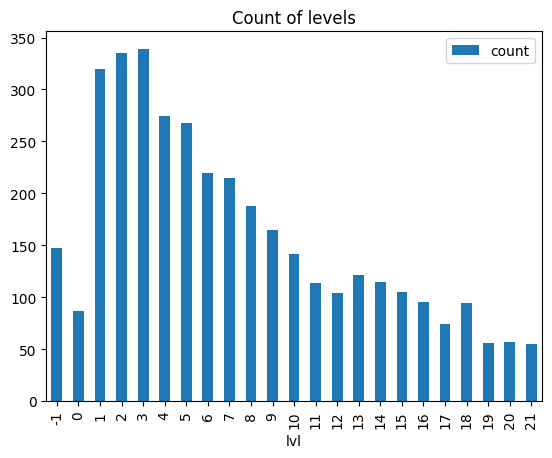

In [7]:
import matplotlib.pyplot as plt


level_count.plot.bar(x="lvl", y="count", title="Count of levels")
plt.show()

## Train test split

### Chronological split

In [9]:
from training.splitting_dataset import split_dataframe


os.chdir("../../../training")
X_train, X_test, y_train, y_test = split_dataframe(df, test_size=0.31)
os.chdir("../notebooks/models/lightgbm")

In [10]:
X_train = X_train.drop(columns=["book"])
X_test = X_test.drop(columns=["book"])

### Random split

In [11]:
(
    X_train_random_split,
    X_test_random_split,
    y_train_random_split,
    y_test_random_split,
) = split_dataframe(df, chronological_split=False)

In [12]:
X_train_random_split = X_train_random_split.drop(columns=["book"])
X_test_random_split = X_test_random_split.drop(columns=["book"])

## LightGBM

## Chronological split

In [13]:
import lightgbm as lgb

lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)

params = {
    "boosting_type": "gbdt",
    "objective": "regression",
    "metric": {"l2", "l1"},
}

gbm = lgb.train(
    params,
    lgb_train,
    num_boost_round=100,
    valid_sets=lgb_eval,
    callbacks=[lgb.early_stopping(stopping_rounds=5)],
)

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000078 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 426
[LightGBM] [Info] Number of data points in the train set: 1626, number of used features: 13
[LightGBM] [Info] Start training from score 7.212177
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[100]	valid_0's l2: 0.377336	valid_0's l1: 0.376859


In [14]:
y_pred_train = gbm.predict(X_train, num_iteration=gbm.best_iteration)
y_pred_test = gbm.predict(X_test, num_iteration=gbm.best_iteration)

In [15]:
from sklearn.metrics import mean_squared_error, mean_absolute_error


rmse = mean_squared_error(y_test, y_pred_test, squared=False)
mae = mean_absolute_error(y_test, y_pred_test)

print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")

RMSE: 0.61
MAE: 0.38


In [16]:
results = pd.DataFrame(
    data={
        "Split type": [],
        "Tuning type": [],
        "Set of features": [],
        "RMSE": [],
        "MAE": [],
    }
)

results.loc[0] = ["chronological", "default", "expanded", rmse, mae]

In [17]:
rmse_train = mean_squared_error(y_train, y_pred_train, squared=False)
rmse_test = mean_squared_error(y_test, y_pred_test, squared=False)
print(f"RMSE train: {rmse_train:.2f}")
print(f"RMSE test: {rmse_test:.2f}")

RMSE train: 0.22
RMSE test: 0.61


###### MAE by level

In [18]:
from training.results import plot_mae_by_level

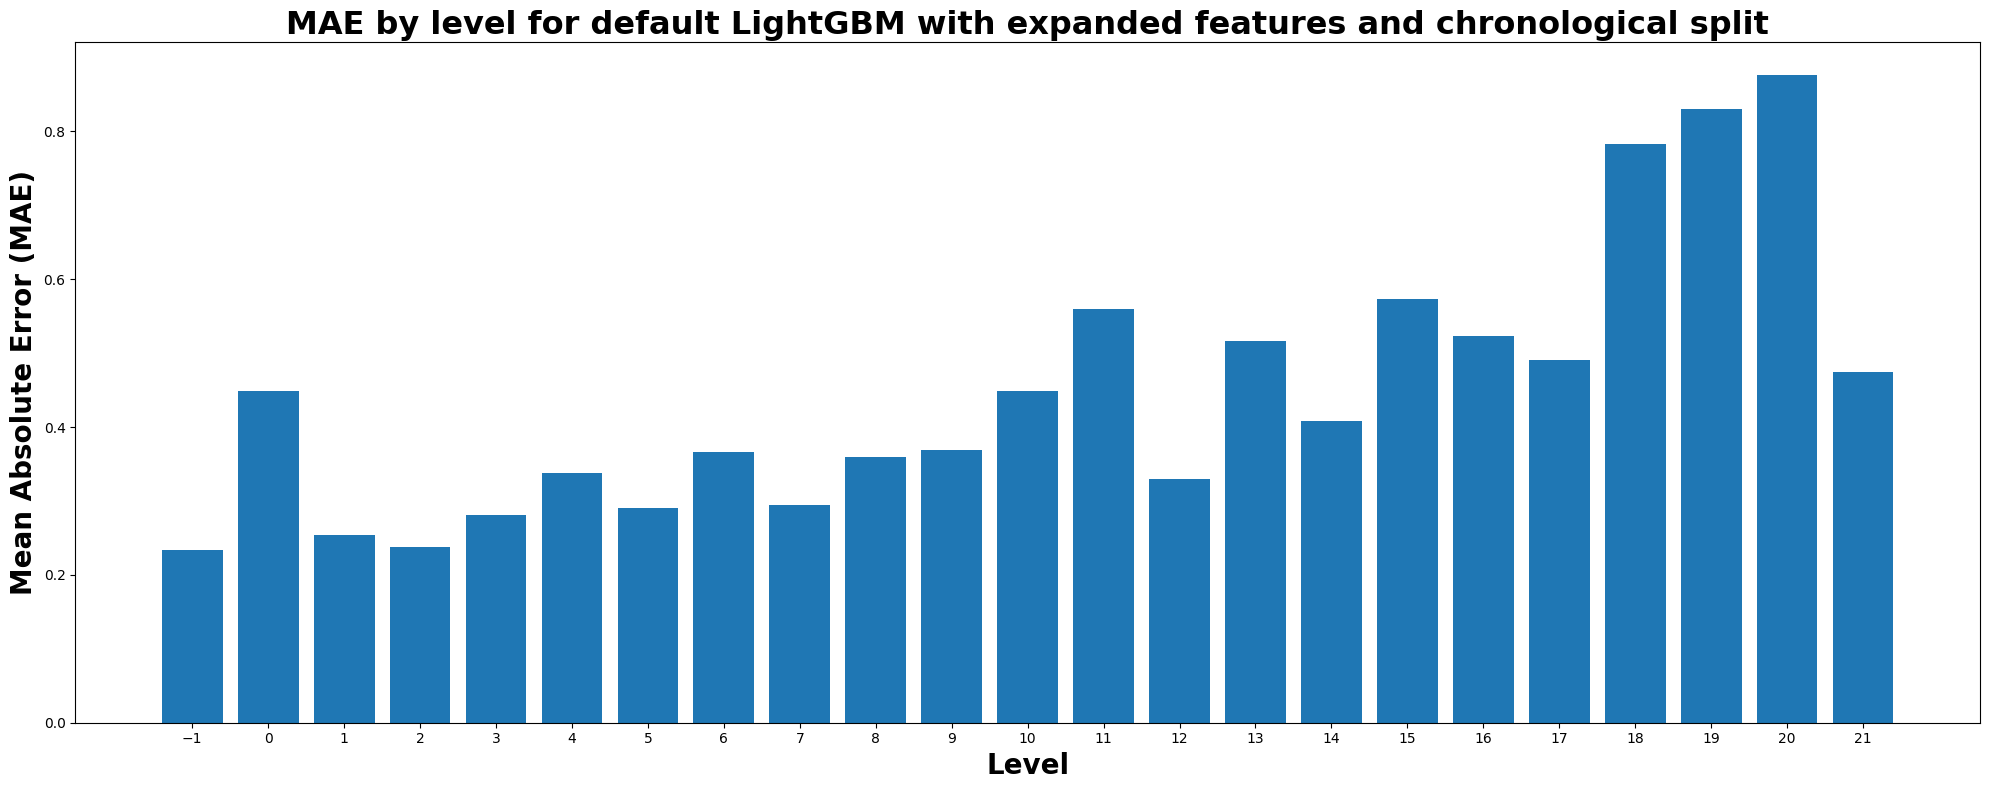

In [19]:
plot_mae_by_level(
    y_test,
    y_pred_test,
    title="MAE by level for default LightGBM with expanded features and chronological split",
)

In [20]:
from training.results import evaluate_round_predictions, plot_confusion_matrix


evaluate_round_predictions([0.5, 0.33, 0.45], y_test, y_pred_test)

Default:
RMSE: 0.61

Round type: 0.5
RMSE: 0.66

Round type: 0.33
RMSE: 0.66

Round type: 0.45
RMSE: 0.65



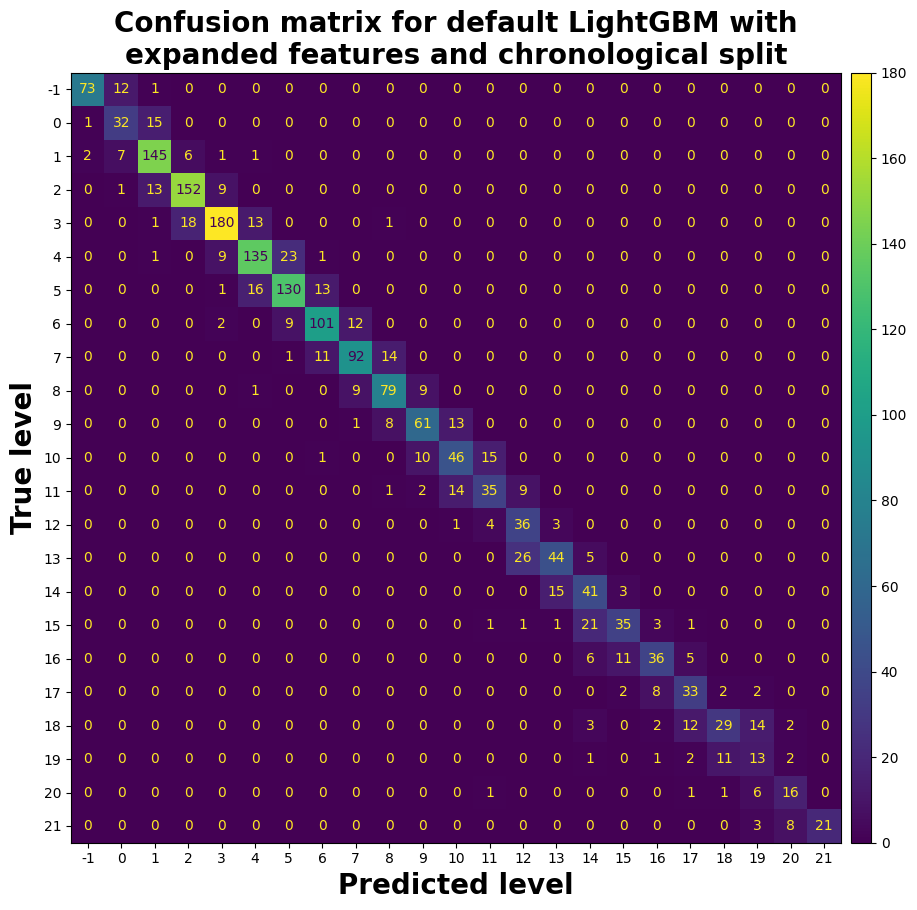

In [21]:
plot_confusion_matrix(
    y_pred_test,
    y_test,
    title="Confusion matrix for default LightGBM with\nexpanded features and chronological split",
)

#### Tuning

In [22]:
from training.results import assess_regression_model

In [23]:
import optuna.integration.lightgbm as lgb
from lightgbm import early_stopping, log_evaluation
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedKFold


lgb_train = lgb.Dataset(X_train, y_train)

params = {
    "boosting_type": "gbdt",
    "objective": "regression",
    "metric": "l2",
    "verbosity": -1,
}

tuner = lgb.LightGBMTunerCV(
    params,
    lgb_train,
    folds=KFold(n_splits=5),
    num_boost_round=10000,
    callbacks=[early_stopping(100), log_evaluation(100)],
)

tuner.run()

[I 2023-11-28 21:35:11,636] A new study created in memory with name: no-name-05910556-dfe6-4b8d-b65f-b600e6636720
feature_fraction, val_score: inf:   0%|          | 0/7 [00:00<?, ?it/s]

Training until validation scores don't improve for 100 rounds
[100]	cv_agg's l2: 0.216042 + 0.134823
[200]	cv_agg's l2: 0.214086 + 0.13298


feature_fraction, val_score: 0.213251:  14%|#4        | 1/7 [00:01<00:10,  1.73s/it]

Early stopping, best iteration is:
[184]	cv_agg's l2: 0.213251 + 0.13309
[100]	cv_agg's l2: 0.21429 + 0.135031
[200]	cv_agg's l2: 0.212231 + 0.130664


feature_fraction, val_score: 0.211849:  29%|##8       | 2/7 [00:03<00:08,  1.79s/it]

Early stopping, best iteration is:
[168]	cv_agg's l2: 0.211849 + 0.131598
[100]	cv_agg's l2: 0.195968 + 0.107782
[200]	cv_agg's l2: 0.194826 + 0.107602


feature_fraction, val_score: 0.194192:  43%|####2     | 3/7 [00:05<00:06,  1.66s/it]

Early stopping, best iteration is:
[171]	cv_agg's l2: 0.194192 + 0.107651
[100]	cv_agg's l2: 0.20623 + 0.12577
[200]	cv_agg's l2: 0.203927 + 0.123077


feature_fraction, val_score: 0.194192:  57%|#####7    | 4/7 [00:07<00:05,  1.99s/it]

Early stopping, best iteration is:
[171]	cv_agg's l2: 0.194192 + 0.107651
[100]	cv_agg's l2: 0.208349 + 0.122633
[200]	cv_agg's l2: 0.207035 + 0.119181


feature_fraction, val_score: 0.194192:  71%|#######1  | 5/7 [00:09<00:03,  1.97s/it]

Early stopping, best iteration is:
[171]	cv_agg's l2: 0.194192 + 0.107651
[100]	cv_agg's l2: 0.201539 + 0.110733
[200]	cv_agg's l2: 0.199597 + 0.107763


feature_fraction, val_score: 0.194192:  86%|########5 | 6/7 [00:10<00:01,  1.81s/it]

Early stopping, best iteration is:
[171]	cv_agg's l2: 0.194192 + 0.107651
[100]	cv_agg's l2: 0.198371 + 0.107965
[200]	cv_agg's l2: 0.19643 + 0.104217


feature_fraction, val_score: 0.194192: 100%|##########| 7/7 [00:12<00:00,  1.82s/it]


Early stopping, best iteration is:
[171]	cv_agg's l2: 0.194192 + 0.107651


num_leaves, val_score: 0.194192:   0%|          | 0/20 [00:00<?, ?it/s]

[100]	cv_agg's l2: 0.206492 + 0.128286


num_leaves, val_score: 0.194192:   5%|5         | 1/20 [00:00<00:15,  1.24it/s]

[200]	cv_agg's l2: 0.200614 + 0.127025
Early stopping, best iteration is:
[171]	cv_agg's l2: 0.194192 + 0.107651


[I 2023-11-28 21:35:25,206] Trial 7 finished with value: 0.2017433706065058 and parameters: {'num_leaves': 10}. Best is trial 7 with value: 0.2017433706065058.
num_leaves, val_score: 0.194192:   5%|5         | 1/20 [00:00<00:15,  1.24it/s]

[100]	cv_agg's l2: 0.194313 + 0.1082


num_leaves, val_score: 0.194017:  10%|#         | 2/20 [00:02<00:22,  1.27s/it]

[200]	cv_agg's l2: 0.196875 + 0.106928
Early stopping, best iteration is:
[105]	cv_agg's l2: 0.194017 + 0.108234
[100]	cv_agg's l2: 0.194313 + 0.1082


num_leaves, val_score: 0.194017:  15%|#5        | 3/20 [00:04<00:25,  1.50s/it]

[200]	cv_agg's l2: 0.196875 + 0.106928
Early stopping, best iteration is:
[105]	cv_agg's l2: 0.194017 + 0.108234
[100]	cv_agg's l2: 0.194313 + 0.1082


num_leaves, val_score: 0.194017:  20%|##        | 4/20 [00:05<00:24,  1.54s/it]

[200]	cv_agg's l2: 0.196875 + 0.106928
Early stopping, best iteration is:
[105]	cv_agg's l2: 0.194017 + 0.108234
[100]	cv_agg's l2: 0.194313 + 0.1082


num_leaves, val_score: 0.194017:  25%|##5       | 5/20 [00:07<00:25,  1.67s/it]

[200]	cv_agg's l2: 0.196875 + 0.106928
Early stopping, best iteration is:
[105]	cv_agg's l2: 0.194017 + 0.108234
[100]	cv_agg's l2: 0.194313 + 0.1082


num_leaves, val_score: 0.194017:  30%|###       | 6/20 [00:09<00:25,  1.86s/it]

[200]	cv_agg's l2: 0.196875 + 0.106928
Early stopping, best iteration is:
[105]	cv_agg's l2: 0.194017 + 0.108234
[100]	cv_agg's l2: 0.194313 + 0.1082


num_leaves, val_score: 0.194017:  35%|###5      | 7/20 [00:11<00:24,  1.87s/it]

[200]	cv_agg's l2: 0.196875 + 0.106928
Early stopping, best iteration is:
[105]	cv_agg's l2: 0.194017 + 0.108234
[100]	cv_agg's l2: 0.194313 + 0.1082


num_leaves, val_score: 0.194017:  40%|####      | 8/20 [00:13<00:23,  1.97s/it]

[200]	cv_agg's l2: 0.196875 + 0.106928
Early stopping, best iteration is:
[105]	cv_agg's l2: 0.194017 + 0.108234
[100]	cv_agg's l2: 0.194313 + 0.1082


num_leaves, val_score: 0.194017:  45%|####5     | 9/20 [00:16<00:21,  1.99s/it]

[200]	cv_agg's l2: 0.196875 + 0.106928
Early stopping, best iteration is:
[105]	cv_agg's l2: 0.194017 + 0.108234
[100]	cv_agg's l2: 0.195594 + 0.10822


num_leaves, val_score: 0.194017:  50%|#####     | 10/20 [00:17<00:18,  1.89s/it]

[200]	cv_agg's l2: 0.19698 + 0.105286
Early stopping, best iteration is:
[105]	cv_agg's l2: 0.194017 + 0.108234
[100]	cv_agg's l2: 0.194313 + 0.1082


num_leaves, val_score: 0.194017:  55%|#####5    | 11/20 [00:20<00:20,  2.32s/it]

[200]	cv_agg's l2: 0.196875 + 0.106928
Early stopping, best iteration is:
[105]	cv_agg's l2: 0.194017 + 0.108234
[100]	cv_agg's l2: 0.194313 + 0.1082


num_leaves, val_score: 0.194017:  60%|######    | 12/20 [00:23<00:20,  2.51s/it]

[200]	cv_agg's l2: 0.196875 + 0.106928
Early stopping, best iteration is:
[105]	cv_agg's l2: 0.194017 + 0.108234
[100]	cv_agg's l2: 0.194313 + 0.1082


num_leaves, val_score: 0.194017:  65%|######5   | 13/20 [00:27<00:19,  2.84s/it]

[200]	cv_agg's l2: 0.196875 + 0.106928
Early stopping, best iteration is:
[105]	cv_agg's l2: 0.194017 + 0.108234
[100]	cv_agg's l2: 0.194313 + 0.1082


num_leaves, val_score: 0.194017:  70%|#######   | 14/20 [00:29<00:15,  2.53s/it]

[200]	cv_agg's l2: 0.196875 + 0.106928
Early stopping, best iteration is:
[105]	cv_agg's l2: 0.194017 + 0.108234
[100]	cv_agg's l2: 0.194313 + 0.1082


num_leaves, val_score: 0.194017:  75%|#######5  | 15/20 [00:31<00:12,  2.44s/it]

[200]	cv_agg's l2: 0.196875 + 0.106928
Early stopping, best iteration is:
[105]	cv_agg's l2: 0.194017 + 0.108234
[100]	cv_agg's l2: 0.194313 + 0.1082


num_leaves, val_score: 0.194017:  80%|########  | 16/20 [00:34<00:09,  2.48s/it]

[200]	cv_agg's l2: 0.196875 + 0.106928
Early stopping, best iteration is:
[105]	cv_agg's l2: 0.194017 + 0.108234
[100]	cv_agg's l2: 0.194313 + 0.1082


num_leaves, val_score: 0.194017:  85%|########5 | 17/20 [00:36<00:07,  2.47s/it]

[200]	cv_agg's l2: 0.196875 + 0.106928
Early stopping, best iteration is:
[105]	cv_agg's l2: 0.194017 + 0.108234
[100]	cv_agg's l2: 0.194313 + 0.1082


num_leaves, val_score: 0.194017:  90%|######### | 18/20 [00:39<00:05,  2.53s/it]

[200]	cv_agg's l2: 0.196875 + 0.106928
Early stopping, best iteration is:
[105]	cv_agg's l2: 0.194017 + 0.108234
[100]	cv_agg's l2: 0.194313 + 0.1082


num_leaves, val_score: 0.194017:  95%|#########5| 19/20 [00:41<00:02,  2.32s/it]

[200]	cv_agg's l2: 0.196875 + 0.106928
Early stopping, best iteration is:
[105]	cv_agg's l2: 0.194017 + 0.108234
[100]	cv_agg's l2: 0.194313 + 0.1082


num_leaves, val_score: 0.194017: 100%|##########| 20/20 [00:43<00:00,  2.18s/it]


[200]	cv_agg's l2: 0.196875 + 0.106928
Early stopping, best iteration is:
[105]	cv_agg's l2: 0.194017 + 0.108234


bagging, val_score: 0.194017:   0%|          | 0/10 [00:00<?, ?it/s]

[100]	cv_agg's l2: 0.213814 + 0.125127


bagging, val_score: 0.194017:  10%|#         | 1/10 [00:01<00:09,  1.01s/it]

[200]	cv_agg's l2: 0.206608 + 0.123831
Early stopping, best iteration is:
[105]	cv_agg's l2: 0.194017 + 0.108234
[100]	cv_agg's l2: 0.198989 + 0.110598


bagging, val_score: 0.194017:  20%|##        | 2/10 [00:02<00:12,  1.52s/it]

[200]	cv_agg's l2: 0.199993 + 0.107915
Early stopping, best iteration is:
[105]	cv_agg's l2: 0.194017 + 0.108234
[100]	cv_agg's l2: 0.218083 + 0.134234


bagging, val_score: 0.194017:  30%|###       | 3/10 [00:04<00:09,  1.41s/it]

[200]	cv_agg's l2: 0.21024 + 0.128127
Early stopping, best iteration is:
[105]	cv_agg's l2: 0.194017 + 0.108234
[100]	cv_agg's l2: 0.194962 + 0.119239


bagging, val_score: 0.194017:  40%|####      | 4/10 [00:05<00:08,  1.42s/it]

[200]	cv_agg's l2: 0.196698 + 0.114409
Early stopping, best iteration is:
[105]	cv_agg's l2: 0.194017 + 0.108234
[100]	cv_agg's l2: 0.197881 + 0.126332


bagging, val_score: 0.194017:  50%|#####     | 5/10 [00:07<00:07,  1.44s/it]

[200]	cv_agg's l2: 0.20069 + 0.121888
Early stopping, best iteration is:
[105]	cv_agg's l2: 0.194017 + 0.108234
[100]	cv_agg's l2: 0.195489 + 0.104108


bagging, val_score: 0.194017:  60%|######    | 6/10 [00:10<00:08,  2.04s/it]

[200]	cv_agg's l2: 0.19606 + 0.102595
Early stopping, best iteration is:
[105]	cv_agg's l2: 0.194017 + 0.108234
[100]	cv_agg's l2: 0.205224 + 0.12365


bagging, val_score: 0.194017:  70%|#######   | 7/10 [00:12<00:06,  2.13s/it]

[200]	cv_agg's l2: 0.205007 + 0.119684
Early stopping, best iteration is:
[105]	cv_agg's l2: 0.194017 + 0.108234
[100]	cv_agg's l2: 0.198042 + 0.113045


bagging, val_score: 0.194017:  80%|########  | 8/10 [00:14<00:04,  2.04s/it]

[200]	cv_agg's l2: 0.197772 + 0.109544
Early stopping, best iteration is:
[105]	cv_agg's l2: 0.194017 + 0.108234
[100]	cv_agg's l2: 0.20608 + 0.120484


bagging, val_score: 0.194017:  90%|######### | 9/10 [00:15<00:01,  1.81s/it]

[200]	cv_agg's l2: 0.201576 + 0.121741
Early stopping, best iteration is:
[105]	cv_agg's l2: 0.194017 + 0.108234
[100]	cv_agg's l2: 0.220429 + 0.115336


bagging, val_score: 0.194017: 100%|##########| 10/10 [00:18<00:00,  1.80s/it]


[200]	cv_agg's l2: 0.210785 + 0.116243
Early stopping, best iteration is:
[105]	cv_agg's l2: 0.194017 + 0.108234


feature_fraction_stage2, val_score: 0.194017:   0%|          | 0/3 [00:00<?, ?it/s]

[100]	cv_agg's l2: 0.202653 + 0.112248


feature_fraction_stage2, val_score: 0.194017:  33%|###3      | 1/3 [00:02<00:04,  2.30s/it]

[200]	cv_agg's l2: 0.204027 + 0.109904
Early stopping, best iteration is:
[105]	cv_agg's l2: 0.194017 + 0.108234
[100]	cv_agg's l2: 0.194313 + 0.1082


feature_fraction_stage2, val_score: 0.194017:  67%|######6   | 2/3 [00:05<00:02,  2.61s/it]

[200]	cv_agg's l2: 0.196875 + 0.106928
Early stopping, best iteration is:
[105]	cv_agg's l2: 0.194017 + 0.108234
[100]	cv_agg's l2: 0.202653 + 0.112248


feature_fraction_stage2, val_score: 0.194017: 100%|##########| 3/3 [00:06<00:00,  2.30s/it]


[200]	cv_agg's l2: 0.204027 + 0.109904
Early stopping, best iteration is:
[105]	cv_agg's l2: 0.194017 + 0.108234


regularization_factors, val_score: 0.194017:   0%|          | 0/20 [00:00<?, ?it/s]

[100]	cv_agg's l2: 0.194789 + 0.107878


regularization_factors, val_score: 0.194017:   5%|5         | 1/20 [00:01<00:35,  1.89s/it]

[200]	cv_agg's l2: 0.198132 + 0.107778
Early stopping, best iteration is:
[105]	cv_agg's l2: 0.194017 + 0.108234
[100]	cv_agg's l2: 0.250317 + 0.140192


regularization_factors, val_score: 0.194017:  10%|#         | 2/20 [00:02<00:20,  1.15s/it]

[200]	cv_agg's l2: 0.240783 + 0.137819
Early stopping, best iteration is:
[105]	cv_agg's l2: 0.194017 + 0.108234
[100]	cv_agg's l2: 0.194313 + 0.1082


regularization_factors, val_score: 0.194017:  15%|#5        | 3/20 [00:04<00:27,  1.60s/it]

[200]	cv_agg's l2: 0.196875 + 0.106928
Early stopping, best iteration is:
[105]	cv_agg's l2: 0.194017 + 0.108234
[100]	cv_agg's l2: 0.194313 + 0.1082


regularization_factors, val_score: 0.194017:  20%|##        | 4/20 [00:06<00:26,  1.64s/it]

[200]	cv_agg's l2: 0.196875 + 0.106928
Early stopping, best iteration is:
[105]	cv_agg's l2: 0.194017 + 0.108234
[100]	cv_agg's l2: 0.194313 + 0.1082
[200]	cv_agg's l2: 0.196875 + 0.106928


regularization_factors, val_score: 0.194017:  25%|##5       | 5/20 [00:10<00:40,  2.72s/it]

Early stopping, best iteration is:
[105]	cv_agg's l2: 0.194017 + 0.108234
[100]	cv_agg's l2: 0.194313 + 0.1082


regularization_factors, val_score: 0.194017:  30%|###       | 6/20 [00:14<00:41,  2.98s/it]

[200]	cv_agg's l2: 0.196875 + 0.106928
Early stopping, best iteration is:
[105]	cv_agg's l2: 0.194017 + 0.108234
[100]	cv_agg's l2: 0.194313 + 0.1082


regularization_factors, val_score: 0.194017:  35%|###5      | 7/20 [00:16<00:33,  2.61s/it]

[200]	cv_agg's l2: 0.196875 + 0.106928
Early stopping, best iteration is:
[105]	cv_agg's l2: 0.194017 + 0.108234
[100]	cv_agg's l2: 0.194313 + 0.1082


regularization_factors, val_score: 0.194017:  40%|####      | 8/20 [00:18<00:28,  2.40s/it]

[200]	cv_agg's l2: 0.196875 + 0.106928
Early stopping, best iteration is:
[105]	cv_agg's l2: 0.194017 + 0.108234
[100]	cv_agg's l2: 0.194313 + 0.1082


regularization_factors, val_score: 0.194017:  45%|####5     | 9/20 [00:20<00:26,  2.42s/it]

[200]	cv_agg's l2: 0.196875 + 0.106928
Early stopping, best iteration is:
[105]	cv_agg's l2: 0.194017 + 0.108234
[100]	cv_agg's l2: 0.194313 + 0.1082


regularization_factors, val_score: 0.194017:  50%|#####     | 10/20 [00:24<00:28,  2.89s/it]

[200]	cv_agg's l2: 0.196875 + 0.106928
Early stopping, best iteration is:
[105]	cv_agg's l2: 0.194017 + 0.108234
[100]	cv_agg's l2: 0.194313 + 0.1082


regularization_factors, val_score: 0.194017:  55%|#####5    | 11/20 [00:27<00:25,  2.87s/it]

[200]	cv_agg's l2: 0.196875 + 0.106928
Early stopping, best iteration is:
[105]	cv_agg's l2: 0.194017 + 0.108234
[100]	cv_agg's l2: 0.194313 + 0.1082


regularization_factors, val_score: 0.194017:  60%|######    | 12/20 [00:30<00:22,  2.82s/it]

[200]	cv_agg's l2: 0.196875 + 0.106928
Early stopping, best iteration is:
[105]	cv_agg's l2: 0.194017 + 0.108234
[100]	cv_agg's l2: 0.194313 + 0.1082


regularization_factors, val_score: 0.194017:  65%|######5   | 13/20 [00:33<00:20,  2.94s/it]

[200]	cv_agg's l2: 0.196875 + 0.106928
Early stopping, best iteration is:
[105]	cv_agg's l2: 0.194017 + 0.108234
[100]	cv_agg's l2: 0.194313 + 0.1082


regularization_factors, val_score: 0.194017:  70%|#######   | 14/20 [00:36<00:17,  2.95s/it]

[200]	cv_agg's l2: 0.196875 + 0.106928
Early stopping, best iteration is:
[105]	cv_agg's l2: 0.194017 + 0.108234
[100]	cv_agg's l2: 0.194313 + 0.1082
[200]	cv_agg's l2: 0.196875 + 0.106928


regularization_factors, val_score: 0.194017:  75%|#######5  | 15/20 [00:41<00:18,  3.74s/it]

Early stopping, best iteration is:
[105]	cv_agg's l2: 0.194017 + 0.108234
[100]	cv_agg's l2: 0.194313 + 0.1082


regularization_factors, val_score: 0.194017:  80%|########  | 16/20 [00:49<00:18,  4.73s/it]

[200]	cv_agg's l2: 0.196875 + 0.106928
Early stopping, best iteration is:
[105]	cv_agg's l2: 0.194017 + 0.108234
[100]	cv_agg's l2: 0.194313 + 0.1082


regularization_factors, val_score: 0.194017:  85%|########5 | 17/20 [00:54<00:14,  4.95s/it]

[200]	cv_agg's l2: 0.196875 + 0.106928
Early stopping, best iteration is:
[105]	cv_agg's l2: 0.194017 + 0.108234
[100]	cv_agg's l2: 0.194313 + 0.1082


regularization_factors, val_score: 0.194016:  90%|######### | 18/20 [00:57<00:08,  4.28s/it]

[200]	cv_agg's l2: 0.196929 + 0.106874
Early stopping, best iteration is:
[105]	cv_agg's l2: 0.194016 + 0.108235
[100]	cv_agg's l2: 0.194313 + 0.1082
[200]	cv_agg's l2: 0.196875 + 0.106928


regularization_factors, val_score: 0.194016:  95%|#########5| 19/20 [01:00<00:04,  4.14s/it]

Early stopping, best iteration is:
[105]	cv_agg's l2: 0.194016 + 0.108235
[100]	cv_agg's l2: 0.194313 + 0.1082


regularization_factors, val_score: 0.194016: 100%|##########| 20/20 [01:04<00:00,  3.23s/it]


[200]	cv_agg's l2: 0.196875 + 0.106928
Early stopping, best iteration is:
[105]	cv_agg's l2: 0.194016 + 0.108235


min_data_in_leaf, val_score: 0.194016:   0%|          | 0/5 [00:00<?, ?it/s]

[100]	cv_agg's l2: 0.192005 + 0.111893
[200]	cv_agg's l2: 0.190654 + 0.10636
Early stopping, best iteration is:
[190]	cv_agg's l2: 0.190492 + 0.106989


min_data_in_leaf, val_score: 0.190492:  20%|##        | 1/5 [00:09<00:38,  9.53s/it]

[100]	cv_agg's l2: 0.200633 + 0.104428
[200]	cv_agg's l2: 0.203127 + 0.102981


min_data_in_leaf, val_score: 0.190492:  40%|####      | 2/5 [00:26<00:41, 13.98s/it]

Early stopping, best iteration is:
[190]	cv_agg's l2: 0.190492 + 0.106989
[100]	cv_agg's l2: 0.227735 + 0.1111
[200]	cv_agg's l2: 0.228405 + 0.111474


min_data_in_leaf, val_score: 0.190492:  60%|######    | 3/5 [00:51<00:37, 18.73s/it]

Early stopping, best iteration is:
[190]	cv_agg's l2: 0.190492 + 0.106989
[100]	cv_agg's l2: 0.309149 + 0.151446
[200]	cv_agg's l2: 0.303333 + 0.158959


min_data_in_leaf, val_score: 0.190492:  80%|########  | 4/5 [00:52<00:11, 11.96s/it]

Early stopping, best iteration is:
[190]	cv_agg's l2: 0.190492 + 0.106989
[100]	cv_agg's l2: 0.215025 + 0.125071
[200]	cv_agg's l2: 0.2148 + 0.122483


min_data_in_leaf, val_score: 0.190492: 100%|##########| 5/5 [00:54<00:00, 10.99s/it]

Early stopping, best iteration is:
[190]	cv_agg's l2: 0.190492 + 0.106989


In [24]:
print(f"Best score: {tuner.best_score}")
best_params = tuner.best_params
print("Params: ")
for key, value in best_params.items():
    print("    {}: {}".format(key, value))

Best score: 0.19049244823017855
Params: 
    boosting_type: gbdt
    objective: regression
    metric: l2
    verbosity: -1
    feature_pre_filter: False
    lambda_l1: 1.6770687911652879e-06
    lambda_l2: 9.203569402501238e-07
    num_leaves: 238
    feature_fraction: 0.4
    bagging_fraction: 1.0
    bagging_freq: 0
    min_child_samples: 25


In [25]:
import lightgbm as lgb

lgb_tuned = lgb.train(
    best_params,
    lgb_train,
    num_boost_round=10000,
)

In [26]:
rmse, mae = assess_regression_model(lgb_tuned, X_train, X_test, y_train, y_test)

RMSE train: 0.02
RMSE test: 0.57
MAE test: 0.37



In [27]:
results.loc[1] = [
    "chronological",
    "Optuna",
    "expanded",
    rmse,
    mae,
]

###### MAE by level

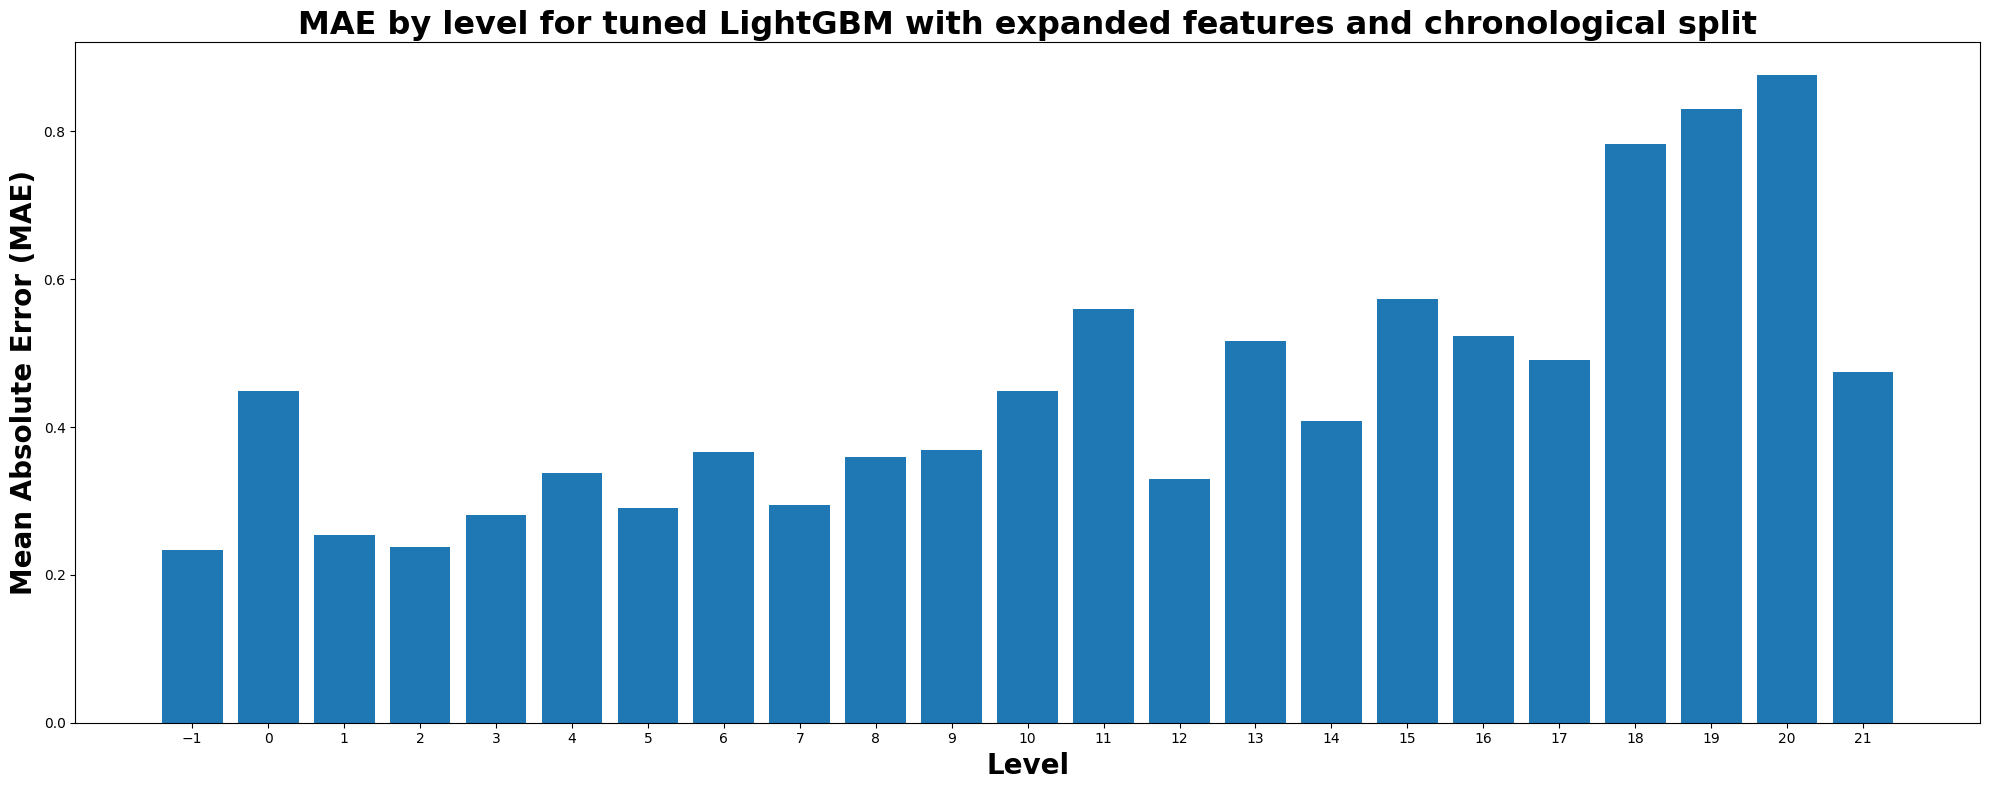

In [28]:
plot_mae_by_level(
    y_test,
    y_pred_test,
    title="MAE by level for tuned LightGBM with expanded features and chronological split",
)

In [29]:
predict = lgb_tuned.predict(X_test)
evaluate_round_predictions([0.5, 0.33, 0.45], y_test, predict)

Default:
RMSE: 0.57

Round type: 0.5
RMSE: 0.62

Round type: 0.33
RMSE: 0.63

Round type: 0.45
RMSE: 0.62



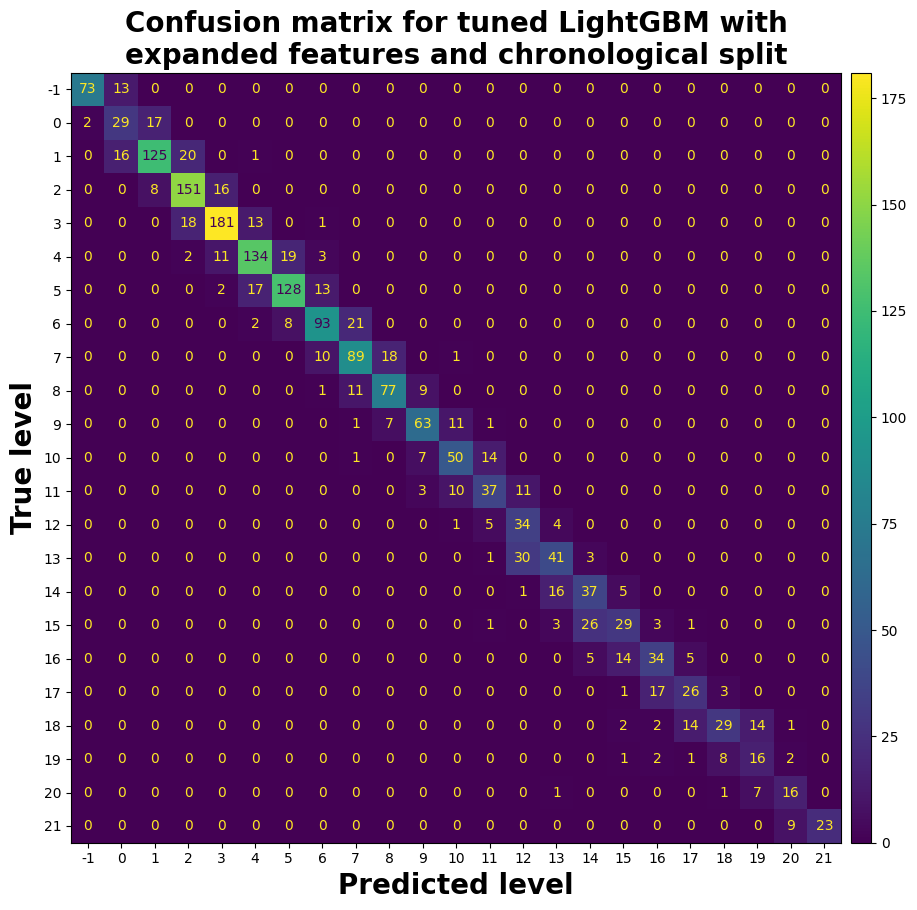

In [30]:
plot_confusion_matrix(
    predict,
    y_test,
    title="Confusion matrix for tuned LightGBM with\nexpanded features and chronological split",
)

## Random split

In [31]:
import lightgbm as lgb
from sklearn.metrics import mean_squared_error

lgb_train = lgb.Dataset(X_train_random_split, y_train_random_split)
lgb_eval = lgb.Dataset(X_test_random_split, y_test_random_split, reference=lgb_train)

params = {
    "boosting_type": "gbdt",
    "objective": "regression",
    "metric": {"l2", "l1"},
}

gbm = lgb.train(
    params,
    lgb_train,
    num_boost_round=100,
    valid_sets=lgb_eval,
    callbacks=[lgb.early_stopping(stopping_rounds=5)],
)

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000667 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 465
[LightGBM] [Info] Number of data points in the train set: 2767, number of used features: 13
[LightGBM] [Info] Start training from score 7.220455
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[96]	valid_0's l2: 0.17368	valid_0's l1: 0.277924


In [32]:
y_pred_train = gbm.predict(X_train_random_split, num_iteration=gbm.best_iteration)
y_pred_test = gbm.predict(X_test_random_split, num_iteration=gbm.best_iteration)

In [33]:
from sklearn.metrics import mean_squared_error, mean_absolute_error


rmse = mean_squared_error(y_test_random_split, y_pred_test, squared=False)
mae = mean_absolute_error(y_test_random_split, y_pred_test)

print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")

RMSE: 0.42
MAE: 0.28


In [34]:
results.loc[2] = ["random", "default", "expanded", rmse, mae]

###### MAE by level

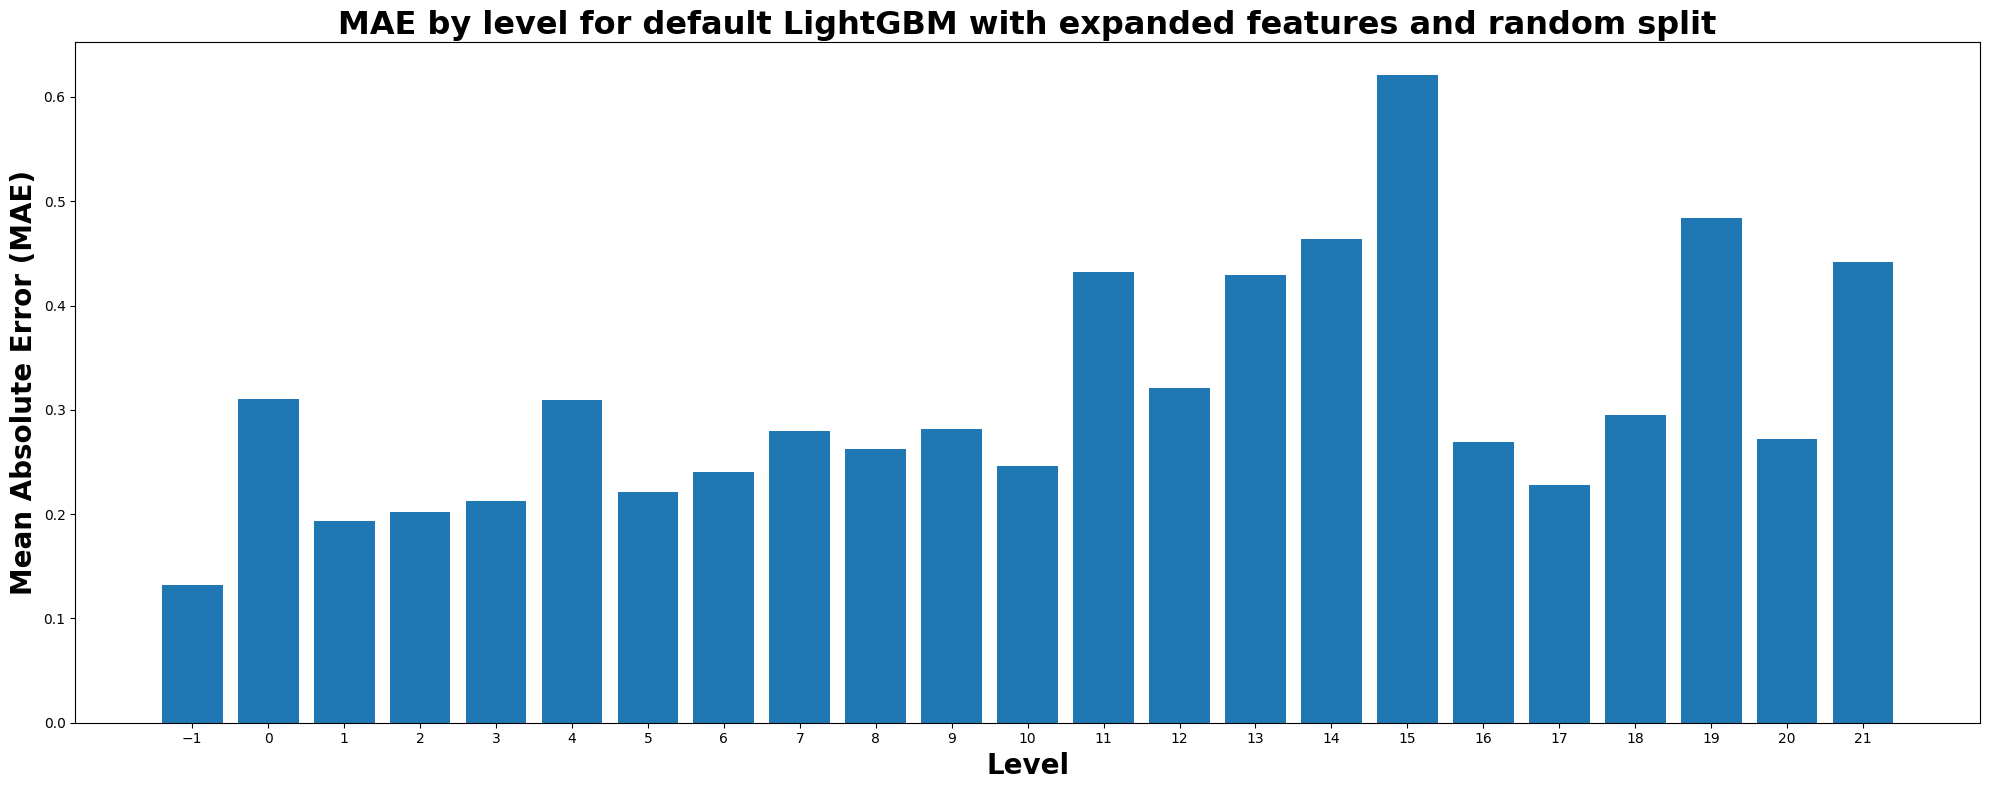

In [35]:
plot_mae_by_level(
    y_test_random_split,
    y_pred_test,
    title="MAE by level for default LightGBM with expanded features and random split",
)

In [36]:
evaluate_round_predictions([0.5, 0.33, 0.45], y_test_random_split, y_pred_test)

Default:
RMSE: 0.42

Round type: 0.5
RMSE: 0.45

Round type: 0.33
RMSE: 0.49

Round type: 0.45
RMSE: 0.46



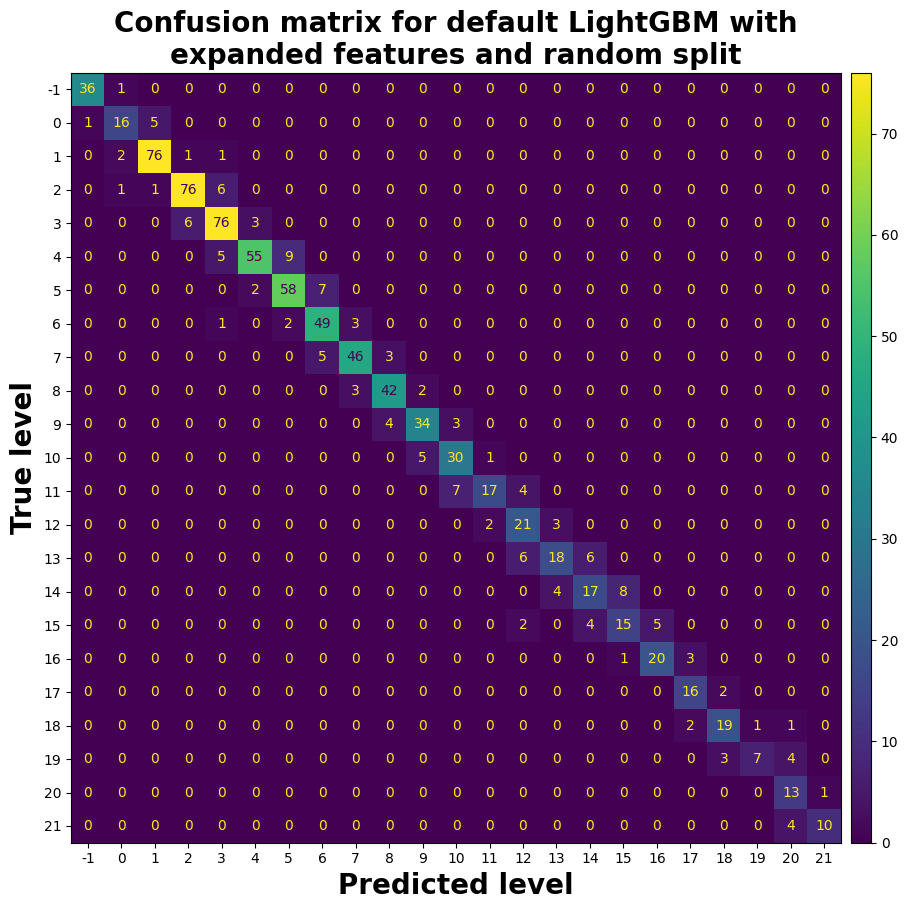

In [37]:
plot_confusion_matrix(
    y_pred_test,
    y_test_random_split,
    title="Confusion matrix for default LightGBM with\nexpanded features and random split",
)

### Tuning

In [38]:
import optuna.integration.lightgbm as lgb
from lightgbm import early_stopping
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedKFold


lgb_train = lgb.Dataset(X_train_random_split, y_train_random_split)

params = {
    "boosting_type": "gbdt",
    "objective": "regression",
    "metric": "l2",
    "verbosity": -1,
}

tuner = lgb.LightGBMTunerCV(
    params,
    lgb_train,
    folds=KFold(n_splits=5),
    num_boost_round=10000,
    callbacks=[early_stopping(100), log_evaluation(100)],
)

tuner.run()

[I 2023-11-28 21:39:15,422] A new study created in memory with name: no-name-b75f3cfb-9f00-46ab-8be2-5ceb1e307ff1
feature_fraction, val_score: inf:   0%|          | 0/7 [00:00<?, ?it/s]

Training until validation scores don't improve for 100 rounds
[100]	cv_agg's l2: 0.248219 + 0.0406982
[200]	cv_agg's l2: 0.24484 + 0.0404405
[300]	cv_agg's l2: 0.245573 + 0.0408202


feature_fraction, val_score: 0.243843:  14%|#4        | 1/7 [00:04<00:27,  4.65s/it]

Early stopping, best iteration is:
[244]	cv_agg's l2: 0.243843 + 0.0404353
[100]	cv_agg's l2: 0.252541 + 0.0519067
[200]	cv_agg's l2: 0.246275 + 0.0484866
[300]	cv_agg's l2: 0.24549 + 0.0469091


feature_fraction, val_score: 0.243843:  29%|##8       | 2/7 [00:07<00:19,  3.84s/it]

Early stopping, best iteration is:
[244]	cv_agg's l2: 0.243843 + 0.0404353
[100]	cv_agg's l2: 0.250468 + 0.0481941
[200]	cv_agg's l2: 0.246875 + 0.0467169
[300]	cv_agg's l2: 0.247078 + 0.0457345


feature_fraction, val_score: 0.243843:  43%|####2     | 3/7 [00:11<00:14,  3.62s/it]

Early stopping, best iteration is:
[244]	cv_agg's l2: 0.243843 + 0.0404353
[100]	cv_agg's l2: 0.250208 + 0.0430874
[200]	cv_agg's l2: 0.249465 + 0.0428922
[300]	cv_agg's l2: 0.249889 + 0.0432239


feature_fraction, val_score: 0.243843:  57%|#####7    | 4/7 [00:13<00:09,  3.14s/it]

Early stopping, best iteration is:
[244]	cv_agg's l2: 0.243843 + 0.0404353
[100]	cv_agg's l2: 0.254121 + 0.0623326
[200]	cv_agg's l2: 0.249501 + 0.0572592
[300]	cv_agg's l2: 0.249104 + 0.0553919


feature_fraction, val_score: 0.243843:  71%|#######1  | 5/7 [00:16<00:05,  2.84s/it]

Early stopping, best iteration is:
[244]	cv_agg's l2: 0.243843 + 0.0404353
[100]	cv_agg's l2: 0.248592 + 0.0394892
[200]	cv_agg's l2: 0.245604 + 0.0405579
[300]	cv_agg's l2: 0.24588 + 0.0404106


feature_fraction, val_score: 0.243843:  86%|########5 | 6/7 [00:19<00:03,  3.18s/it]

Early stopping, best iteration is:
[244]	cv_agg's l2: 0.243843 + 0.0404353
[100]	cv_agg's l2: 0.248529 + 0.0485072
[200]	cv_agg's l2: 0.247235 + 0.048547
[300]	cv_agg's l2: 0.246889 + 0.0471656


feature_fraction, val_score: 0.243843: 100%|##########| 7/7 [00:23<00:00,  3.35s/it]


Early stopping, best iteration is:
[244]	cv_agg's l2: 0.243843 + 0.0404353


num_leaves, val_score: 0.243843:   0%|          | 0/20 [00:00<?, ?it/s]

[100]	cv_agg's l2: 0.256706 + 0.0496142
[200]	cv_agg's l2: 0.257873 + 0.0488518
[300]	cv_agg's l2: 0.260596 + 0.0489442


num_leaves, val_score: 0.243843:   5%|5         | 1/20 [00:06<02:09,  6.80s/it]

Early stopping, best iteration is:
[244]	cv_agg's l2: 0.243843 + 0.0404353
[100]	cv_agg's l2: 0.256706 + 0.0496142
[200]	cv_agg's l2: 0.257873 + 0.0488518
[300]	cv_agg's l2: 0.260596 + 0.0489442


num_leaves, val_score: 0.243843:  10%|#         | 2/20 [00:12<01:52,  6.23s/it]

Early stopping, best iteration is:
[244]	cv_agg's l2: 0.243843 + 0.0404353
[100]	cv_agg's l2: 0.250851 + 0.0441322
[200]	cv_agg's l2: 0.245009 + 0.0424067
[300]	cv_agg's l2: 0.243553 + 0.0411525


num_leaves, val_score: 0.242876:  15%|#5        | 3/20 [00:15<01:16,  4.49s/it]

Early stopping, best iteration is:
[270]	cv_agg's l2: 0.242876 + 0.0408809
[100]	cv_agg's l2: 0.291457 + 0.0475181
[200]	cv_agg's l2: 0.268625 + 0.0452489
[300]	cv_agg's l2: 0.258078 + 0.0432453
Early stopping, best iteration is:
[270]	cv_agg's l2: 0.242876 + 0.0408809


num_leaves, val_score: 0.242876:  20%|##        | 4/20 [00:15<00:48,  3.05s/it]

[100]	cv_agg's l2: 0.349726 + 0.0480446
[200]	cv_agg's l2: 0.311111 + 0.0466033


num_leaves, val_score: 0.242876:  25%|##5       | 5/20 [00:16<00:33,  2.24s/it]

[300]	cv_agg's l2: 0.291568 + 0.0423946
Early stopping, best iteration is:
[270]	cv_agg's l2: 0.242876 + 0.0408809
[100]	cv_agg's l2: 0.256706 + 0.0496142
[200]	cv_agg's l2: 0.257873 + 0.0488518
[300]	cv_agg's l2: 0.260596 + 0.0489442


num_leaves, val_score: 0.242876:  30%|###       | 6/20 [00:22<00:47,  3.43s/it]

Early stopping, best iteration is:
[270]	cv_agg's l2: 0.242876 + 0.0408809
[100]	cv_agg's l2: 0.256207 + 0.0481935
[200]	cv_agg's l2: 0.257446 + 0.0477471
[300]	cv_agg's l2: 0.258561 + 0.0474744


num_leaves, val_score: 0.242876:  35%|###5      | 7/20 [00:29<00:59,  4.57s/it]

Early stopping, best iteration is:
[270]	cv_agg's l2: 0.242876 + 0.0408809
[100]	cv_agg's l2: 0.253266 + 0.048574
[200]	cv_agg's l2: 0.25432 + 0.0476735
[300]	cv_agg's l2: 0.256658 + 0.0478471


num_leaves, val_score: 0.242876:  40%|####      | 8/20 [00:34<00:57,  4.83s/it]

Early stopping, best iteration is:
[270]	cv_agg's l2: 0.242876 + 0.0408809
[100]	cv_agg's l2: 0.256706 + 0.0496142
[200]	cv_agg's l2: 0.257873 + 0.0488518
[300]	cv_agg's l2: 0.260596 + 0.0489442


num_leaves, val_score: 0.242876:  45%|####5     | 9/20 [00:41<01:00,  5.48s/it]

Early stopping, best iteration is:
[270]	cv_agg's l2: 0.242876 + 0.0408809
[100]	cv_agg's l2: 0.256706 + 0.0496142
[200]	cv_agg's l2: 0.257873 + 0.0488518
[300]	cv_agg's l2: 0.260596 + 0.0489442


num_leaves, val_score: 0.242876:  50%|#####     | 10/20 [00:50<01:04,  6.48s/it]

Early stopping, best iteration is:
[270]	cv_agg's l2: 0.242876 + 0.0408809
[100]	cv_agg's l2: 0.254374 + 0.0474679
[200]	cv_agg's l2: 0.254396 + 0.0480998
[300]	cv_agg's l2: 0.256224 + 0.0483593


num_leaves, val_score: 0.242876:  55%|#####5    | 11/20 [00:54<00:52,  5.78s/it]

Early stopping, best iteration is:
[270]	cv_agg's l2: 0.242876 + 0.0408809
[100]	cv_agg's l2: 0.256706 + 0.0496142
[200]	cv_agg's l2: 0.257873 + 0.0488518
[300]	cv_agg's l2: 0.260596 + 0.0489442


num_leaves, val_score: 0.242876:  60%|######    | 12/20 [01:00<00:45,  5.72s/it]

Early stopping, best iteration is:
[270]	cv_agg's l2: 0.242876 + 0.0408809
[100]	cv_agg's l2: 0.256706 + 0.0496142
[200]	cv_agg's l2: 0.257873 + 0.0488518
[300]	cv_agg's l2: 0.260596 + 0.0489442


num_leaves, val_score: 0.242876:  65%|######5   | 13/20 [01:06<00:42,  6.02s/it]

Early stopping, best iteration is:
[270]	cv_agg's l2: 0.242876 + 0.0408809
[100]	cv_agg's l2: 0.252958 + 0.0465935
[200]	cv_agg's l2: 0.249962 + 0.0467355
[300]	cv_agg's l2: 0.250109 + 0.0467468


num_leaves, val_score: 0.242876:  70%|#######   | 14/20 [01:11<00:33,  5.62s/it]

Early stopping, best iteration is:
[270]	cv_agg's l2: 0.242876 + 0.0408809
[100]	cv_agg's l2: 0.256706 + 0.0496142
[200]	cv_agg's l2: 0.257873 + 0.0488518
[300]	cv_agg's l2: 0.260596 + 0.0489442


num_leaves, val_score: 0.242876:  75%|#######5  | 15/20 [01:17<00:28,  5.69s/it]

Early stopping, best iteration is:
[270]	cv_agg's l2: 0.242876 + 0.0408809
[100]	cv_agg's l2: 0.256087 + 0.048308
[200]	cv_agg's l2: 0.25545 + 0.0473223
[300]	cv_agg's l2: 0.257268 + 0.0472529


num_leaves, val_score: 0.242876:  80%|########  | 16/20 [01:25<00:26,  6.56s/it]

Early stopping, best iteration is:
[270]	cv_agg's l2: 0.242876 + 0.0408809
[100]	cv_agg's l2: 0.244746 + 0.0424371
[200]	cv_agg's l2: 0.240421 + 0.0435827
[300]	cv_agg's l2: 0.240051 + 0.0436657


num_leaves, val_score: 0.239783:  85%|########5 | 17/20 [01:30<00:18,  6.08s/it]

Early stopping, best iteration is:
[286]	cv_agg's l2: 0.239783 + 0.0436318
[100]	cv_agg's l2: 0.250524 + 0.0457769
[200]	cv_agg's l2: 0.247069 + 0.0463471
[300]	cv_agg's l2: 0.248651 + 0.0463688


num_leaves, val_score: 0.239783:  90%|######### | 18/20 [01:35<00:11,  5.54s/it]

Early stopping, best iteration is:
[286]	cv_agg's l2: 0.239783 + 0.0436318
[100]	cv_agg's l2: 0.26341 + 0.04678
[200]	cv_agg's l2: 0.25015 + 0.0440235
[300]	cv_agg's l2: 0.247125 + 0.0437932


num_leaves, val_score: 0.239783:  95%|#########5| 19/20 [01:37<00:04,  4.50s/it]

Early stopping, best iteration is:
[286]	cv_agg's l2: 0.239783 + 0.0436318
[100]	cv_agg's l2: 0.254789 + 0.0474753
[200]	cv_agg's l2: 0.255741 + 0.0488195
[300]	cv_agg's l2: 0.258264 + 0.0486118


num_leaves, val_score: 0.239783: 100%|##########| 20/20 [01:42<00:00,  5.11s/it]


Early stopping, best iteration is:
[286]	cv_agg's l2: 0.239783 + 0.0436318


bagging, val_score: 0.239783:   0%|          | 0/10 [00:00<?, ?it/s]

[100]	cv_agg's l2: 0.252266 + 0.0459148
[200]	cv_agg's l2: 0.246715 + 0.0485934
[300]	cv_agg's l2: 0.247418 + 0.0479006


bagging, val_score: 0.239783:  10%|#         | 1/10 [00:04<00:39,  4.36s/it]

Early stopping, best iteration is:
[286]	cv_agg's l2: 0.239783 + 0.0436318
[100]	cv_agg's l2: 0.248306 + 0.0422354
[200]	cv_agg's l2: 0.242783 + 0.0420314
[300]	cv_agg's l2: 0.24353 + 0.0418627


bagging, val_score: 0.239783:  20%|##        | 2/10 [00:07<00:28,  3.57s/it]

Early stopping, best iteration is:
[286]	cv_agg's l2: 0.239783 + 0.0436318
[100]	cv_agg's l2: 0.247452 + 0.0426596
[200]	cv_agg's l2: 0.243813 + 0.043401
[300]	cv_agg's l2: 0.244258 + 0.0438253


bagging, val_score: 0.239783:  30%|###       | 3/10 [00:10<00:22,  3.25s/it]

Early stopping, best iteration is:
[286]	cv_agg's l2: 0.239783 + 0.0436318
[100]	cv_agg's l2: 0.252959 + 0.0404699
[200]	cv_agg's l2: 0.250419 + 0.0419626
[300]	cv_agg's l2: 0.249656 + 0.0406507


bagging, val_score: 0.239783:  40%|####      | 4/10 [00:16<00:26,  4.45s/it]

Early stopping, best iteration is:
[286]	cv_agg's l2: 0.239783 + 0.0436318
[100]	cv_agg's l2: 0.247156 + 0.0449129
[200]	cv_agg's l2: 0.242249 + 0.0430695
[300]	cv_agg's l2: 0.241125 + 0.042859


bagging, val_score: 0.239783:  50%|#####     | 5/10 [00:20<00:22,  4.44s/it]

Early stopping, best iteration is:
[286]	cv_agg's l2: 0.239783 + 0.0436318
[100]	cv_agg's l2: 0.249334 + 0.0430345
[200]	cv_agg's l2: 0.246056 + 0.0423809
[300]	cv_agg's l2: 0.244875 + 0.041989


bagging, val_score: 0.239783:  60%|######    | 6/10 [00:23<00:15,  3.87s/it]

Early stopping, best iteration is:
[286]	cv_agg's l2: 0.239783 + 0.0436318
[100]	cv_agg's l2: 0.250429 + 0.0487481
[200]	cv_agg's l2: 0.244937 + 0.0502787
[300]	cv_agg's l2: 0.246461 + 0.052341


bagging, val_score: 0.239783:  70%|#######   | 7/10 [00:26<00:10,  3.65s/it]

Early stopping, best iteration is:
[286]	cv_agg's l2: 0.239783 + 0.0436318
[100]	cv_agg's l2: 0.251178 + 0.0454793
[200]	cv_agg's l2: 0.247132 + 0.0439369
[300]	cv_agg's l2: 0.247415 + 0.0434634


bagging, val_score: 0.239783:  80%|########  | 8/10 [00:29<00:06,  3.34s/it]

Early stopping, best iteration is:
[286]	cv_agg's l2: 0.239783 + 0.0436318
[100]	cv_agg's l2: 0.248087 + 0.0399142
[200]	cv_agg's l2: 0.24499 + 0.0417611
[300]	cv_agg's l2: 0.244533 + 0.0414367


bagging, val_score: 0.239783:  90%|######### | 9/10 [00:32<00:03,  3.19s/it]

Early stopping, best iteration is:
[286]	cv_agg's l2: 0.239783 + 0.0436318
[100]	cv_agg's l2: 0.251478 + 0.0402374
[200]	cv_agg's l2: 0.249431 + 0.0408842
[300]	cv_agg's l2: 0.250283 + 0.0397204


bagging, val_score: 0.239783: 100%|##########| 10/10 [00:34<00:00,  3.47s/it]


Early stopping, best iteration is:
[286]	cv_agg's l2: 0.239783 + 0.0436318


feature_fraction_stage2, val_score: 0.239783:   0%|          | 0/6 [00:00<?, ?it/s]

[100]	cv_agg's l2: 0.248601 + 0.0442722
[200]	cv_agg's l2: 0.246193 + 0.0432761
[300]	cv_agg's l2: 0.247806 + 0.0440131


feature_fraction_stage2, val_score: 0.239783:  17%|#6        | 1/6 [00:02<00:11,  2.33s/it]

Early stopping, best iteration is:
[286]	cv_agg's l2: 0.239783 + 0.0436318
[100]	cv_agg's l2: 0.249199 + 0.0458194
[200]	cv_agg's l2: 0.244345 + 0.0457038
[300]	cv_agg's l2: 0.244313 + 0.0443568


feature_fraction_stage2, val_score: 0.239783:  33%|###3      | 2/6 [00:05<00:11,  2.81s/it]

Early stopping, best iteration is:
[286]	cv_agg's l2: 0.239783 + 0.0436318
[100]	cv_agg's l2: 0.248601 + 0.0442722
[200]	cv_agg's l2: 0.246193 + 0.0432761
[300]	cv_agg's l2: 0.247806 + 0.0440131


feature_fraction_stage2, val_score: 0.239783:  50%|#####     | 3/6 [00:07<00:07,  2.58s/it]

Early stopping, best iteration is:
[286]	cv_agg's l2: 0.239783 + 0.0436318
[100]	cv_agg's l2: 0.249199 + 0.0458194
[200]	cv_agg's l2: 0.244345 + 0.0457038
[300]	cv_agg's l2: 0.244313 + 0.0443568


feature_fraction_stage2, val_score: 0.239783:  67%|######6   | 4/6 [00:10<00:05,  2.81s/it]

Early stopping, best iteration is:
[286]	cv_agg's l2: 0.239783 + 0.0436318
[100]	cv_agg's l2: 0.244746 + 0.0424371
[200]	cv_agg's l2: 0.240421 + 0.0435827
[300]	cv_agg's l2: 0.240051 + 0.0436657


feature_fraction_stage2, val_score: 0.239783:  83%|########3 | 5/6 [00:15<00:03,  3.26s/it]

Early stopping, best iteration is:
[286]	cv_agg's l2: 0.239783 + 0.0436318
[100]	cv_agg's l2: 0.244746 + 0.0424371
[200]	cv_agg's l2: 0.240421 + 0.0435827
[300]	cv_agg's l2: 0.240051 + 0.0436657


feature_fraction_stage2, val_score: 0.239783: 100%|##########| 6/6 [00:17<00:00,  2.96s/it]


Early stopping, best iteration is:
[286]	cv_agg's l2: 0.239783 + 0.0436318


regularization_factors, val_score: 0.239783:   0%|          | 0/20 [00:00<?, ?it/s]

[100]	cv_agg's l2: 0.247139 + 0.0429373
[200]	cv_agg's l2: 0.241441 + 0.0429439
[300]	cv_agg's l2: 0.243253 + 0.0433267


regularization_factors, val_score: 0.239783:   5%|5         | 1/20 [00:03<00:59,  3.14s/it]

Early stopping, best iteration is:
[286]	cv_agg's l2: 0.239783 + 0.0436318
[100]	cv_agg's l2: 0.280858 + 0.0526682
[200]	cv_agg's l2: 0.269826 + 0.0513073


regularization_factors, val_score: 0.239783:  10%|#         | 2/20 [00:04<00:38,  2.12s/it]

[300]	cv_agg's l2: 0.268253 + 0.0505863
Early stopping, best iteration is:
[286]	cv_agg's l2: 0.239783 + 0.0436318
[100]	cv_agg's l2: 0.244746 + 0.0424371
[200]	cv_agg's l2: 0.240421 + 0.0435827
[300]	cv_agg's l2: 0.240051 + 0.0436657


regularization_factors, val_score: 0.239783:  15%|#5        | 3/20 [00:07<00:40,  2.38s/it]

Early stopping, best iteration is:
[286]	cv_agg's l2: 0.239783 + 0.0436318
[100]	cv_agg's l2: 0.244746 + 0.0424371
[200]	cv_agg's l2: 0.240421 + 0.0435827
[300]	cv_agg's l2: 0.240051 + 0.0436657


regularization_factors, val_score: 0.239783:  20%|##        | 4/20 [00:11<00:50,  3.16s/it]

Early stopping, best iteration is:
[286]	cv_agg's l2: 0.239783 + 0.0436318
[100]	cv_agg's l2: 0.244746 + 0.0424371
[200]	cv_agg's l2: 0.240421 + 0.0435827
[300]	cv_agg's l2: 0.240051 + 0.0436657


regularization_factors, val_score: 0.239783:  25%|##5       | 5/20 [00:16<00:59,  3.94s/it]

Early stopping, best iteration is:
[286]	cv_agg's l2: 0.239783 + 0.0436318
[100]	cv_agg's l2: 0.244746 + 0.0424371
[200]	cv_agg's l2: 0.240421 + 0.0435827
[300]	cv_agg's l2: 0.240051 + 0.0436657


regularization_factors, val_score: 0.239783:  30%|###       | 6/20 [00:21<00:56,  4.05s/it]

Early stopping, best iteration is:
[286]	cv_agg's l2: 0.239783 + 0.0436318
[100]	cv_agg's l2: 0.244746 + 0.0424371
[200]	cv_agg's l2: 0.240421 + 0.0435827
[300]	cv_agg's l2: 0.240051 + 0.0436657


regularization_factors, val_score: 0.239783:  35%|###5      | 7/20 [00:25<00:55,  4.24s/it]

Early stopping, best iteration is:
[286]	cv_agg's l2: 0.239783 + 0.0436318
[100]	cv_agg's l2: 0.244746 + 0.0424371
[200]	cv_agg's l2: 0.240421 + 0.0435827
[300]	cv_agg's l2: 0.240051 + 0.0436657


regularization_factors, val_score: 0.239783:  40%|####      | 8/20 [00:29<00:49,  4.13s/it]

Early stopping, best iteration is:
[286]	cv_agg's l2: 0.239783 + 0.0436318
[100]	cv_agg's l2: 0.244746 + 0.0424371
[200]	cv_agg's l2: 0.240421 + 0.0435827
[300]	cv_agg's l2: 0.240051 + 0.0436657


regularization_factors, val_score: 0.239783:  45%|####5     | 9/20 [00:33<00:43,  3.93s/it]

Early stopping, best iteration is:
[286]	cv_agg's l2: 0.239783 + 0.0436318
[100]	cv_agg's l2: 0.244746 + 0.0424371
[200]	cv_agg's l2: 0.240421 + 0.0435827
[300]	cv_agg's l2: 0.240051 + 0.0436657


regularization_factors, val_score: 0.239783:  50%|#####     | 10/20 [00:36<00:37,  3.71s/it]

Early stopping, best iteration is:
[286]	cv_agg's l2: 0.239783 + 0.0436318
[100]	cv_agg's l2: 0.244746 + 0.0424371
[200]	cv_agg's l2: 0.240421 + 0.0435827
[300]	cv_agg's l2: 0.240051 + 0.0436657


regularization_factors, val_score: 0.239783:  55%|#####5    | 11/20 [00:39<00:32,  3.56s/it]

Early stopping, best iteration is:
[286]	cv_agg's l2: 0.239783 + 0.0436318
[100]	cv_agg's l2: 0.244746 + 0.0424371
[200]	cv_agg's l2: 0.240421 + 0.0435827
[300]	cv_agg's l2: 0.240051 + 0.0436657


regularization_factors, val_score: 0.239783:  60%|######    | 12/20 [00:42<00:27,  3.46s/it]

Early stopping, best iteration is:
[286]	cv_agg's l2: 0.239783 + 0.0436318
[100]	cv_agg's l2: 0.244746 + 0.0424371
[200]	cv_agg's l2: 0.240421 + 0.0435827
[300]	cv_agg's l2: 0.240051 + 0.0436657


regularization_factors, val_score: 0.239783:  65%|######5   | 13/20 [00:47<00:26,  3.83s/it]

Early stopping, best iteration is:
[286]	cv_agg's l2: 0.239783 + 0.0436318
[100]	cv_agg's l2: 0.244746 + 0.0424371
[200]	cv_agg's l2: 0.240421 + 0.0435827
[300]	cv_agg's l2: 0.240051 + 0.0436657


regularization_factors, val_score: 0.239783:  70%|#######   | 14/20 [00:53<00:26,  4.47s/it]

Early stopping, best iteration is:
[286]	cv_agg's l2: 0.239783 + 0.0436318
[100]	cv_agg's l2: 0.244746 + 0.0424371
[200]	cv_agg's l2: 0.240214 + 0.0434288
[300]	cv_agg's l2: 0.240075 + 0.043682


regularization_factors, val_score: 0.239541:  75%|#######5  | 15/20 [01:01<00:27,  5.45s/it]

Early stopping, best iteration is:
[248]	cv_agg's l2: 0.239541 + 0.0435813
[100]	cv_agg's l2: 0.244746 + 0.0424371
[200]	cv_agg's l2: 0.240214 + 0.0434288
[300]	cv_agg's l2: 0.240075 + 0.043682


regularization_factors, val_score: 0.239541:  80%|########  | 16/20 [01:08<00:24,  6.15s/it]

Early stopping, best iteration is:
[248]	cv_agg's l2: 0.239541 + 0.0435813
[100]	cv_agg's l2: 0.244746 + 0.0424371
[200]	cv_agg's l2: 0.240214 + 0.0434288
[300]	cv_agg's l2: 0.240089 + 0.0436714


regularization_factors, val_score: 0.239541:  85%|########5 | 17/20 [01:16<00:20,  6.69s/it]

Early stopping, best iteration is:
[248]	cv_agg's l2: 0.239541 + 0.0435813
[100]	cv_agg's l2: 0.244746 + 0.0424371
[200]	cv_agg's l2: 0.240214 + 0.0434288
[300]	cv_agg's l2: 0.240075 + 0.043682


regularization_factors, val_score: 0.239541:  90%|######### | 18/20 [01:22<00:12,  6.34s/it]

Early stopping, best iteration is:
[248]	cv_agg's l2: 0.239541 + 0.0435813
[100]	cv_agg's l2: 0.244746 + 0.0424371
[200]	cv_agg's l2: 0.240214 + 0.0434288
[300]	cv_agg's l2: 0.240075 + 0.043682


regularization_factors, val_score: 0.239541:  95%|#########5| 19/20 [01:26<00:05,  5.74s/it]

Early stopping, best iteration is:
[248]	cv_agg's l2: 0.239541 + 0.0435813
[100]	cv_agg's l2: 0.244746 + 0.0424371
[200]	cv_agg's l2: 0.240214 + 0.0434288
[300]	cv_agg's l2: 0.240089 + 0.0436714


regularization_factors, val_score: 0.239541: 100%|##########| 20/20 [01:30<00:00,  4.55s/it]


Early stopping, best iteration is:
[248]	cv_agg's l2: 0.239541 + 0.0435813


min_data_in_leaf, val_score: 0.239541:   0%|          | 0/5 [00:00<?, ?it/s]

[100]	cv_agg's l2: 0.249064 + 0.0453313
[200]	cv_agg's l2: 0.243004 + 0.0443686
[300]	cv_agg's l2: 0.241114 + 0.0441616


min_data_in_leaf, val_score: 0.239541:  20%|##        | 1/5 [00:04<00:16,  4.04s/it]

Early stopping, best iteration is:
[248]	cv_agg's l2: 0.239541 + 0.0435813
[100]	cv_agg's l2: 0.248545 + 0.0444582
[200]	cv_agg's l2: 0.24449 + 0.0451505
[300]	cv_agg's l2: 0.243553 + 0.0455037


min_data_in_leaf, val_score: 0.239541:  40%|####      | 2/5 [00:08<00:12,  4.14s/it]

Early stopping, best iteration is:
[248]	cv_agg's l2: 0.239541 + 0.0435813
[100]	cv_agg's l2: 0.297424 + 0.0534476
[200]	cv_agg's l2: 0.279322 + 0.0517417
[300]	cv_agg's l2: 0.274191 + 0.051291


min_data_in_leaf, val_score: 0.239541:  60%|######    | 3/5 [00:11<00:07,  3.50s/it]

Early stopping, best iteration is:
[248]	cv_agg's l2: 0.239541 + 0.0435813
[100]	cv_agg's l2: 0.251457 + 0.0467705
[200]	cv_agg's l2: 0.246021 + 0.0465957
[300]	cv_agg's l2: 0.247574 + 0.0464012


min_data_in_leaf, val_score: 0.239541:  80%|########  | 4/5 [00:15<00:03,  3.80s/it]

Early stopping, best iteration is:
[248]	cv_agg's l2: 0.239541 + 0.0435813
[100]	cv_agg's l2: 0.261948 + 0.0513527
[200]	cv_agg's l2: 0.250999 + 0.0529393
[300]	cv_agg's l2: 0.24908 + 0.0538776


min_data_in_leaf, val_score: 0.239541: 100%|##########| 5/5 [00:19<00:00,  3.86s/it]

Early stopping, best iteration is:
[248]	cv_agg's l2: 0.239541 + 0.0435813


In [39]:
print(f"Best score: {tuner.best_score}")
best_params = tuner.best_params
print("Params: ")
for key, value in best_params.items():
    print("    {}: {}".format(key, value))

Best score: 0.23954096355465399
Params: 
    boosting_type: gbdt
    objective: regression
    metric: l2
    verbosity: -1
    feature_pre_filter: False
    lambda_l1: 1.0756123758279087e-06
    lambda_l2: 1.858431975946552e-06
    num_leaves: 29
    feature_fraction: 0.7
    bagging_fraction: 1.0
    bagging_freq: 0
    min_child_samples: 20


In [40]:
import lightgbm as lgb

lgb_tuned = lgb.train(
    best_params,
    lgb_train,
    num_boost_round=10000,
)

In [41]:
rmse, mae = assess_regression_model(
    lgb_tuned,
    X_train_random_split,
    X_test_random_split,
    y_train_random_split,
    y_test_random_split,
)

RMSE train: 0.04
RMSE test: 0.42
MAE test: 0.28



In [42]:
results.loc[3] = ["random", "Optuna", "expanded", rmse, mae]

###### MAE by level

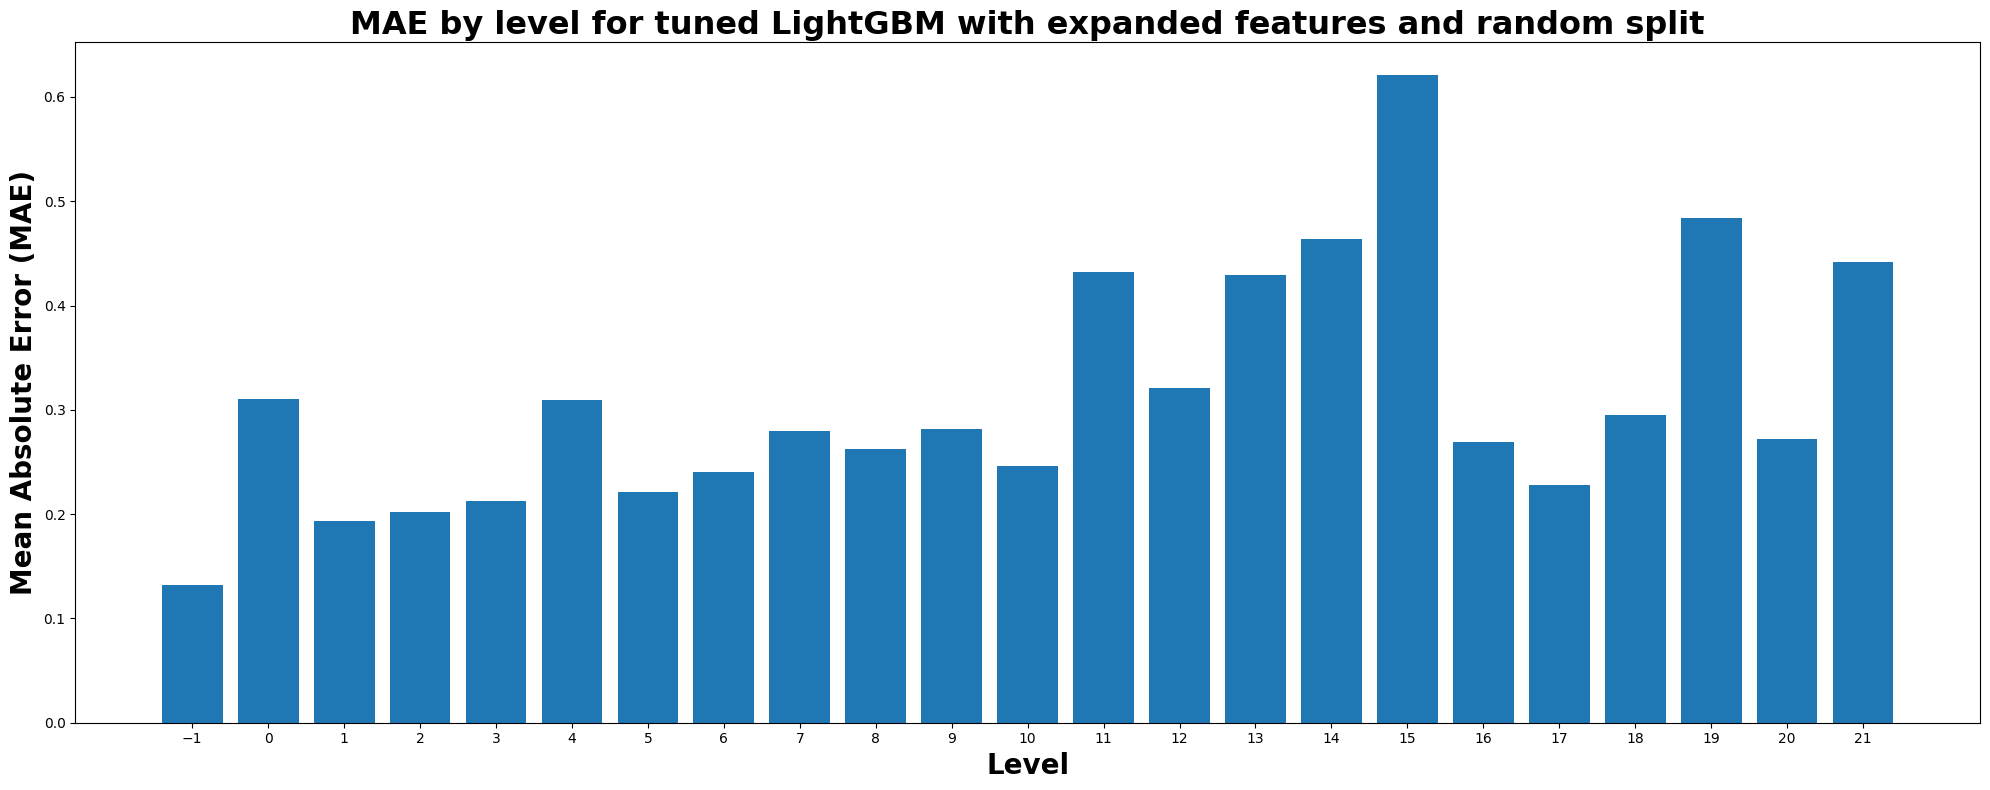

In [43]:
plot_mae_by_level(
    y_test_random_split,
    y_pred_test,
    title="MAE by level for tuned LightGBM with expanded features and random split",
)

In [44]:
predict = lgb_tuned.predict(X_test)
evaluate_round_predictions([0.5, 0.33, 0.45], y_test, predict)

Default:
RMSE: 0.24

Round type: 0.5
RMSE: 0.26

Round type: 0.33
RMSE: 0.28

Round type: 0.45
RMSE: 0.26



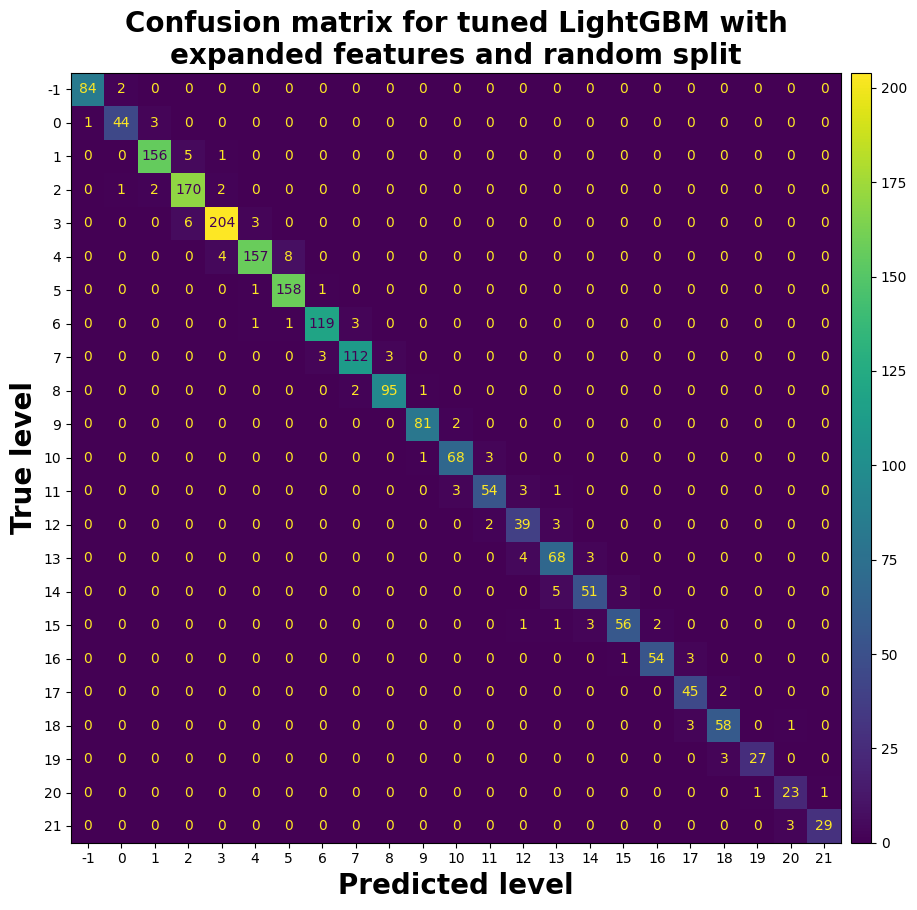

In [45]:
plot_confusion_matrix(
    predict,
    y_test,
    title="Confusion matrix for tuned LightGBM with\nexpanded features and random split",
)

## Summary

In [46]:
results

,Split type,Tuning type,Set of features,RMSE,MAE
0,chronological,default,expanded,0.614277,0.376859
1,chronological,Optuna,expanded,0.574970,0.371609
2,random,default,expanded,0.416749,0.277924
3,random,Optuna,expanded,0.424966,0.275662


In [47]:
from training.results import plot_summary

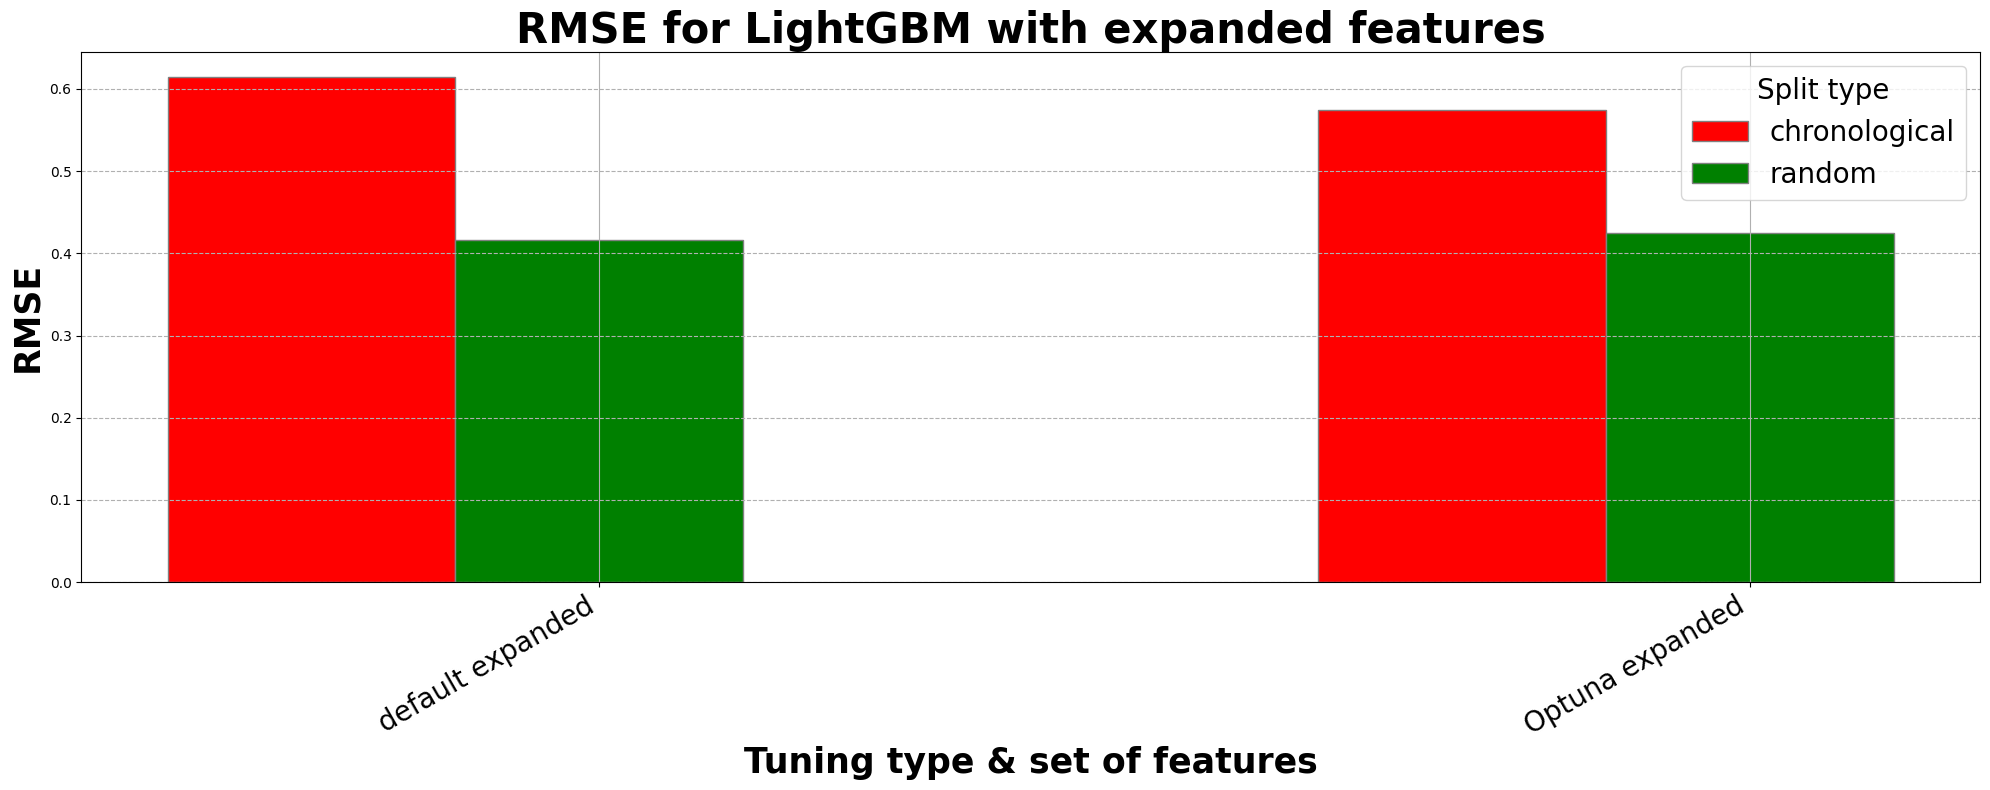

In [48]:
plot_summary(results, "RMSE", title="RMSE for LightGBM with expanded features")

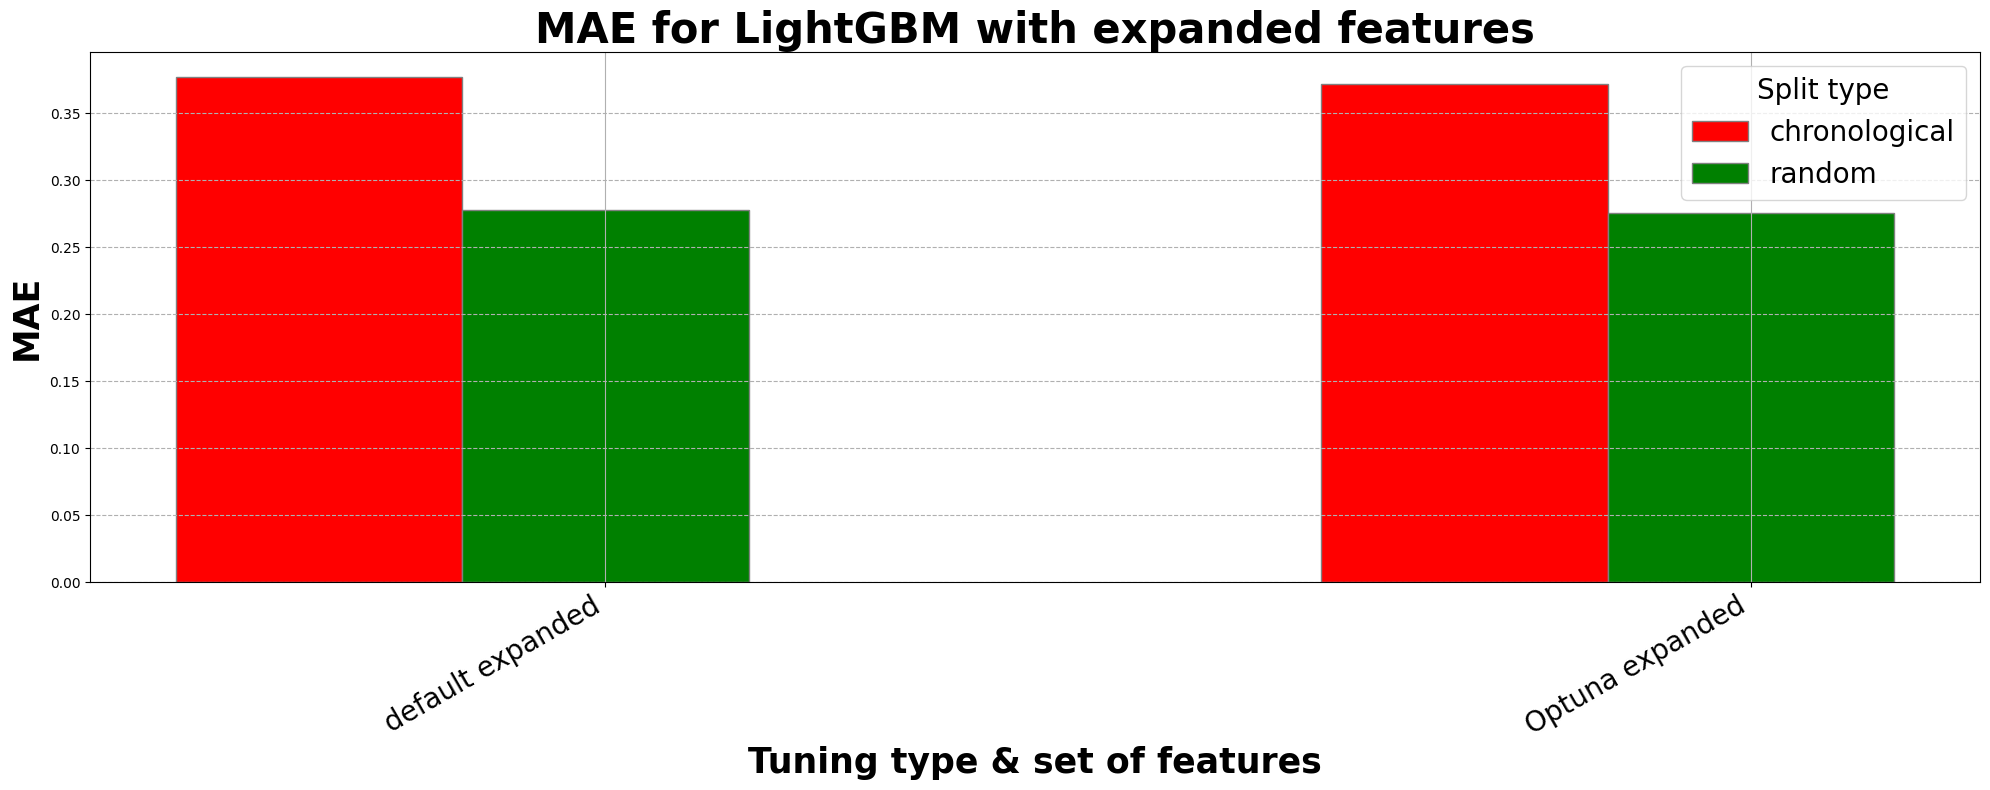

In [49]:
plot_summary(results, "MAE", title="MAE for LightGBM with expanded features")

In [50]:
results.to_csv("./lightgbm_expanded_results.csv")